# GECCO2019 - Bi-objective Traveling Thief Problem 

This worksheet contains the evaluation for the competition at **GECCO2019**. 
After having received all submissions, the evaluation will be done as follows:

After having received all submissions, the evaluation will be done as follows:

For each of the nine test problems

a) We will merge the solution sets of all submissions and extract the non-dominated set.

b) The minimum in time and the maximum in profit will be used to determine the reference point.

c) With respect to this reference point the quality of each submission will be measured using the hypervolume indicator.

d) We will sort the submissions according to the achieved hypervolume in descending order and give points as follows: 1st place -> 3 points, 2nd place -> 2 points, 3rd place -> 1 point.


By adding up the points for each submission we will create the overall ranking. Please note, that depending on the number of submissions the evaluation might need to be reconsidered.

The validation has already been done using the Java code. Which means that each submission has the correct number of solutions (less than the maximum specfied at the competition homepage).


## Imports necessary for the evaluation

## Participants and Problems

In [4]:
from non_dominated_sorting import fast_non_dominated_sort
import os.path
import numpy as np
import matplotlib.pyplot as plt
from hv import Hypervolume
from normalization import normalize
import pandas as pd
# the result folder as a path
folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "evaluations/results")

# all submissions received
participants = [   
                    "nds-brkga_bi",
                    "PN-DRLMOA",
                    "AM-DRLMOA",
                      "PN-PHN",
                      "AM-PHN",
#                     "mpn-r1nes-lin",
#                     "mpn-r1nes",
                    
#                     "mpn-phn-eil",
#                     "mpn-eil",
#                     "att-drlmoa-eil",
#                     "att-r1nes-eil",
#                     "att-phn-eil"
                      "PN-MBPS",
               ]

participant_name_dict = {
    "nds-brkga_bi":"NDS-BRKGA",
    "PN-DRLMOA":"PN-DRLMOA",
    "AM-DRLMOA":"AM-DRLMOA",
    "PN-PHN":"PN-PHN",
    "AM-PHN":"AM-PHN",
    "PN-MBPS":"PN-MBPS",
    "mpn-r1nes-lin":"PN-MBPS",
    "mpn-phn-eil":"PN-PHN",
    "mpn-eil":"PN-DRLMOA1",
    "att-drlmoa-eil":"AM-DRLMOA1",
    "att-r1nes-eil":"AM-MBPS",
    "att-phn-eil":"AM-PHN"
    
}
graph = []
graph += ["ch150"]*120
# graph += ["eil76"]*120
print(graph)

problems = [
                    "ch150_n1490_bounded-strongly-corr_01",
"ch150_n1490_bounded-strongly-corr_02",
"ch150_n1490_bounded-strongly-corr_03",
"ch150_n1490_bounded-strongly-corr_04",
"ch150_n1490_bounded-strongly-corr_05",
"ch150_n1490_bounded-strongly-corr_06",
"ch150_n1490_bounded-strongly-corr_07",
"ch150_n1490_bounded-strongly-corr_08",
"ch150_n1490_bounded-strongly-corr_09",
"ch150_n1490_bounded-strongly-corr_10",
"ch150_n1490_uncorr-similar-weights_01",
"ch150_n1490_uncorr-similar-weights_02",
"ch150_n1490_uncorr-similar-weights_03",
"ch150_n1490_uncorr-similar-weights_04",
"ch150_n1490_uncorr-similar-weights_05",
"ch150_n1490_uncorr-similar-weights_06",
"ch150_n1490_uncorr-similar-weights_07",
"ch150_n1490_uncorr-similar-weights_08",
"ch150_n1490_uncorr-similar-weights_09",
"ch150_n1490_uncorr-similar-weights_10",
"ch150_n1490_uncorr_01",
"ch150_n1490_uncorr_02",
"ch150_n1490_uncorr_03",
"ch150_n1490_uncorr_04",
"ch150_n1490_uncorr_05",
"ch150_n1490_uncorr_06",
"ch150_n1490_uncorr_07",
"ch150_n1490_uncorr_08",
"ch150_n1490_uncorr_09",
"ch150_n1490_uncorr_10",
"ch150_n149_bounded-strongly-corr_01",
"ch150_n149_bounded-strongly-corr_02",
"ch150_n149_bounded-strongly-corr_03",
"ch150_n149_bounded-strongly-corr_04",
"ch150_n149_bounded-strongly-corr_05",
"ch150_n149_bounded-strongly-corr_06",
"ch150_n149_bounded-strongly-corr_07",
"ch150_n149_bounded-strongly-corr_08",
"ch150_n149_bounded-strongly-corr_09",
"ch150_n149_bounded-strongly-corr_10",
"ch150_n149_uncorr-similar-weights_01",
"ch150_n149_uncorr-similar-weights_02",
"ch150_n149_uncorr-similar-weights_03",
"ch150_n149_uncorr-similar-weights_04",
"ch150_n149_uncorr-similar-weights_05",
"ch150_n149_uncorr-similar-weights_06",
"ch150_n149_uncorr-similar-weights_07",
"ch150_n149_uncorr-similar-weights_08",
"ch150_n149_uncorr-similar-weights_09",
"ch150_n149_uncorr-similar-weights_10",
"ch150_n149_uncorr_01",
"ch150_n149_uncorr_02",
"ch150_n149_uncorr_03",
"ch150_n149_uncorr_04",
"ch150_n149_uncorr_05",
"ch150_n149_uncorr_06",
"ch150_n149_uncorr_07",
"ch150_n149_uncorr_08",
"ch150_n149_uncorr_09",
"ch150_n149_uncorr_10",
"ch150_n447_bounded-strongly-corr_01",
"ch150_n447_bounded-strongly-corr_02",
"ch150_n447_bounded-strongly-corr_03",
"ch150_n447_bounded-strongly-corr_04",
"ch150_n447_bounded-strongly-corr_05",
"ch150_n447_bounded-strongly-corr_06",
"ch150_n447_bounded-strongly-corr_07",
"ch150_n447_bounded-strongly-corr_08",
"ch150_n447_bounded-strongly-corr_09",
"ch150_n447_bounded-strongly-corr_10",
"ch150_n447_uncorr-similar-weights_01",
"ch150_n447_uncorr-similar-weights_02",
"ch150_n447_uncorr-similar-weights_03",
"ch150_n447_uncorr-similar-weights_04",
"ch150_n447_uncorr-similar-weights_05",
"ch150_n447_uncorr-similar-weights_06",
"ch150_n447_uncorr-similar-weights_07",
"ch150_n447_uncorr-similar-weights_08",
"ch150_n447_uncorr-similar-weights_09",
"ch150_n447_uncorr-similar-weights_10",
"ch150_n447_uncorr_01",
"ch150_n447_uncorr_02",
"ch150_n447_uncorr_03",
"ch150_n447_uncorr_04",
"ch150_n447_uncorr_05",
"ch150_n447_uncorr_06",
"ch150_n447_uncorr_07",
"ch150_n447_uncorr_08",
"ch150_n447_uncorr_09",
"ch150_n447_uncorr_10",
"ch150_n745_bounded-strongly-corr_01",
"ch150_n745_bounded-strongly-corr_02",
"ch150_n745_bounded-strongly-corr_03",
"ch150_n745_bounded-strongly-corr_04",
"ch150_n745_bounded-strongly-corr_05",
"ch150_n745_bounded-strongly-corr_06",
"ch150_n745_bounded-strongly-corr_07",
"ch150_n745_bounded-strongly-corr_08",
"ch150_n745_bounded-strongly-corr_09",
"ch150_n745_bounded-strongly-corr_10",
"ch150_n745_uncorr-similar-weights_01",
"ch150_n745_uncorr-similar-weights_02",
"ch150_n745_uncorr-similar-weights_03",
"ch150_n745_uncorr-similar-weights_04",
"ch150_n745_uncorr-similar-weights_05",
"ch150_n745_uncorr-similar-weights_06",
"ch150_n745_uncorr-similar-weights_07",
"ch150_n745_uncorr-similar-weights_08",
"ch150_n745_uncorr-similar-weights_09",
"ch150_n745_uncorr-similar-weights_10",
"ch150_n745_uncorr_01",
"ch150_n745_uncorr_02",
"ch150_n745_uncorr_03",
"ch150_n745_uncorr_04",
"ch150_n745_uncorr_05",
"ch150_n745_uncorr_06",
"ch150_n745_uncorr_07",
"ch150_n745_uncorr_08",
"ch150_n745_uncorr_09",
"ch150_n745_uncorr_10",
# "eil76_n225_bounded-strongly-corr_01",
# "eil76_n225_bounded-strongly-corr_02",
# "eil76_n225_bounded-strongly-corr_03",
# "eil76_n225_bounded-strongly-corr_04",
# "eil76_n225_bounded-strongly-corr_05",
# "eil76_n225_bounded-strongly-corr_06",
# "eil76_n225_bounded-strongly-corr_07",
# "eil76_n225_bounded-strongly-corr_08",
# "eil76_n225_bounded-strongly-corr_09",
# "eil76_n225_bounded-strongly-corr_10",
# "eil76_n225_uncorr-similar-weights_01",
# "eil76_n225_uncorr-similar-weights_02",
# "eil76_n225_uncorr-similar-weights_03",
# "eil76_n225_uncorr-similar-weights_04",
# "eil76_n225_uncorr-similar-weights_05",
# "eil76_n225_uncorr-similar-weights_06",
# "eil76_n225_uncorr-similar-weights_07",
# "eil76_n225_uncorr-similar-weights_08",
# "eil76_n225_uncorr-similar-weights_09",
# "eil76_n225_uncorr-similar-weights_10",
# "eil76_n225_uncorr_01",
# "eil76_n225_uncorr_02",
# "eil76_n225_uncorr_03",
# "eil76_n225_uncorr_04",
# "eil76_n225_uncorr_05",
# "eil76_n225_uncorr_06",
# "eil76_n225_uncorr_07",
# "eil76_n225_uncorr_08",
# "eil76_n225_uncorr_09",
# "eil76_n225_uncorr_10",
# "eil76_n375_bounded-strongly-corr_01",
# "eil76_n375_bounded-strongly-corr_02",
# "eil76_n375_bounded-strongly-corr_03",
# "eil76_n375_bounded-strongly-corr_04",
# "eil76_n375_bounded-strongly-corr_05",
# "eil76_n375_bounded-strongly-corr_06",
# "eil76_n375_bounded-strongly-corr_07",
# "eil76_n375_bounded-strongly-corr_08",
# "eil76_n375_bounded-strongly-corr_09",
# "eil76_n375_bounded-strongly-corr_10",
# "eil76_n375_uncorr-similar-weights_01",
# "eil76_n375_uncorr-similar-weights_02",
# "eil76_n375_uncorr-similar-weights_03",
# "eil76_n375_uncorr-similar-weights_04",
# "eil76_n375_uncorr-similar-weights_05",
# "eil76_n375_uncorr-similar-weights_06",
# "eil76_n375_uncorr-similar-weights_07",
# "eil76_n375_uncorr-similar-weights_08",
# "eil76_n375_uncorr-similar-weights_09",
# "eil76_n375_uncorr-similar-weights_10",
# "eil76_n375_uncorr_01",
# "eil76_n375_uncorr_02",
# "eil76_n375_uncorr_03",
# "eil76_n375_uncorr_04",
# "eil76_n375_uncorr_05",
# "eil76_n375_uncorr_06",
# "eil76_n375_uncorr_07",
# "eil76_n375_uncorr_08",
# "eil76_n375_uncorr_09",
# "eil76_n375_uncorr_10",
# "eil76_n750_bounded-strongly-corr_01",
# "eil76_n750_bounded-strongly-corr_02",
# "eil76_n750_bounded-strongly-corr_03",
# "eil76_n750_bounded-strongly-corr_04",
# "eil76_n750_bounded-strongly-corr_05",
# "eil76_n750_bounded-strongly-corr_06",
# "eil76_n750_bounded-strongly-corr_07",
# "eil76_n750_bounded-strongly-corr_08",
# "eil76_n750_bounded-strongly-corr_09",
# "eil76_n750_bounded-strongly-corr_10",
# "eil76_n750_uncorr-similar-weights_01",
# "eil76_n750_uncorr-similar-weights_02",
# "eil76_n750_uncorr-similar-weights_03",
# "eil76_n750_uncorr-similar-weights_04",
# "eil76_n750_uncorr-similar-weights_05",
# "eil76_n750_uncorr-similar-weights_06",
# "eil76_n750_uncorr-similar-weights_07",
# "eil76_n750_uncorr-similar-weights_08",
# "eil76_n750_uncorr-similar-weights_09",
# "eil76_n750_uncorr-similar-weights_10",
# "eil76_n750_uncorr_01",
# "eil76_n750_uncorr_02",
# "eil76_n750_uncorr_03",
# "eil76_n750_uncorr_04",
# "eil76_n750_uncorr_05",
# "eil76_n750_uncorr_06",
# "eil76_n750_uncorr_07",
# "eil76_n750_uncorr_08",
# "eil76_n750_uncorr_09",
# "eil76_n750_uncorr_10",
# "eil76_n75_bounded-strongly-corr_01",
# "eil76_n75_bounded-strongly-corr_02",
# "eil76_n75_bounded-strongly-corr_03",
# "eil76_n75_bounded-strongly-corr_04",
# "eil76_n75_bounded-strongly-corr_05",
# "eil76_n75_bounded-strongly-corr_06",
# "eil76_n75_bounded-strongly-corr_07",
# "eil76_n75_bounded-strongly-corr_08",
# "eil76_n75_bounded-strongly-corr_09",
# "eil76_n75_bounded-strongly-corr_10",
# "eil76_n75_uncorr-similar-weights_01",
# "eil76_n75_uncorr-similar-weights_02",
# "eil76_n75_uncorr-similar-weights_03",
# "eil76_n75_uncorr-similar-weights_04",
# "eil76_n75_uncorr-similar-weights_05",
# "eil76_n75_uncorr-similar-weights_06",
# "eil76_n75_uncorr-similar-weights_07",
# "eil76_n75_uncorr-similar-weights_08",
# "eil76_n75_uncorr-similar-weights_09",
# "eil76_n75_uncorr-similar-weights_10",
# "eil76_n75_uncorr_01",
# "eil76_n75_uncorr_02",
# "eil76_n75_uncorr_03",
# "eil76_n75_uncorr_04",
# "eil76_n75_uncorr_05",
# "eil76_n75_uncorr_06",
# "eil76_n75_uncorr_07",
# "eil76_n75_uncorr_08",
# "eil76_n75_uncorr_09",
# "eil76_n75_uncorr_10",
#     "lin105_n1040_bounded-strongly-corr_01",
#     "lin105_n1040_bounded-strongly-corr_02",
#     "lin105_n1040_bounded-strongly-corr_03",
#     "lin105_n1040_bounded-strongly-corr_04",
#     "lin105_n1040_bounded-strongly-corr_05",
#     "lin105_n1040_bounded-strongly-corr_06",
#     "lin105_n1040_bounded-strongly-corr_07",
#     "lin105_n1040_bounded-strongly-corr_08",
#     "lin105_n1040_bounded-strongly-corr_09",
#     "lin105_n1040_bounded-strongly-corr_10",
#     "lin105_n1040_uncorr-similar-weights_01",
#     "lin105_n1040_uncorr-similar-weights_02",
#     "lin105_n1040_uncorr-similar-weights_03",
#     "lin105_n1040_uncorr-similar-weights_04",
#     "lin105_n1040_uncorr-similar-weights_05",
#     "lin105_n1040_uncorr-similar-weights_06",
#     "lin105_n1040_uncorr-similar-weights_07",
#     "lin105_n1040_uncorr-similar-weights_08",
#     "lin105_n1040_uncorr-similar-weights_09",
#     "lin105_n1040_uncorr-similar-weights_10",
#     "lin105_n1040_uncorr_01",
#     "lin105_n1040_uncorr_02",
#     "lin105_n1040_uncorr_03",
#     "lin105_n1040_uncorr_04",
#     "lin105_n1040_uncorr_05",
#     "lin105_n1040_uncorr_06",
#     "lin105_n1040_uncorr_07",
#     "lin105_n1040_uncorr_08",
#     "lin105_n1040_uncorr_09",
#     "lin105_n1040_uncorr_10",
#     "lin105_n104_bounded-strongly-corr_01",
#     "lin105_n104_bounded-strongly-corr_02",
#     "lin105_n104_bounded-strongly-corr_03",
#     "lin105_n104_bounded-strongly-corr_04",
#     "lin105_n104_bounded-strongly-corr_05",
#     "lin105_n104_bounded-strongly-corr_06",
#     "lin105_n104_bounded-strongly-corr_07",
#     "lin105_n104_bounded-strongly-corr_08",
#     "lin105_n104_bounded-strongly-corr_09",
#     "lin105_n104_bounded-strongly-corr_10",
#     "lin105_n104_uncorr-similar-weights_01",
#     "lin105_n104_uncorr-similar-weights_02",
#     "lin105_n104_uncorr-similar-weights_03",
#     "lin105_n104_uncorr-similar-weights_04",
#     "lin105_n104_uncorr-similar-weights_05",
#     "lin105_n104_uncorr-similar-weights_06",
#     "lin105_n104_uncorr-similar-weights_07",
#     "lin105_n104_uncorr-similar-weights_08",
#     "lin105_n104_uncorr-similar-weights_09",
#     "lin105_n104_uncorr-similar-weights_10",
#     "lin105_n104_uncorr_01",
#     "lin105_n104_uncorr_02",
#     "lin105_n104_uncorr_03",
#     "lin105_n104_uncorr_04",
#     "lin105_n104_uncorr_05",
#     "lin105_n104_uncorr_06",
#     "lin105_n104_uncorr_07",
#     "lin105_n104_uncorr_08",
#     "lin105_n104_uncorr_09",
#     "lin105_n104_uncorr_10",
#     "lin105_n312_bounded-strongly-corr_01",
#     "lin105_n312_bounded-strongly-corr_02",
#     "lin105_n312_bounded-strongly-corr_03",
#     "lin105_n312_bounded-strongly-corr_04",
#     "lin105_n312_bounded-strongly-corr_05",
#     "lin105_n312_bounded-strongly-corr_06",
#     "lin105_n312_bounded-strongly-corr_07",
#     "lin105_n312_bounded-strongly-corr_08",
#     "lin105_n312_bounded-strongly-corr_09",
#     "lin105_n312_bounded-strongly-corr_10",
#     "lin105_n312_uncorr-similar-weights_01",
#     "lin105_n312_uncorr-similar-weights_02",
#     "lin105_n312_uncorr-similar-weights_03",
#     "lin105_n312_uncorr-similar-weights_04",
#     "lin105_n312_uncorr-similar-weights_05",
#     "lin105_n312_uncorr-similar-weights_06",
#     "lin105_n312_uncorr-similar-weights_07",
#     "lin105_n312_uncorr-similar-weights_08",
#     "lin105_n312_uncorr-similar-weights_09",
#     "lin105_n312_uncorr-similar-weights_10",
#     "lin105_n312_uncorr_01",
#     "lin105_n312_uncorr_02",
#     "lin105_n312_uncorr_03",
#     "lin105_n312_uncorr_04",
#     "lin105_n312_uncorr_05",
#     "lin105_n312_uncorr_06",
#     "lin105_n312_uncorr_07",
#     "lin105_n312_uncorr_08",
#     "lin105_n312_uncorr_09",
#     "lin105_n312_uncorr_10",
#     "lin105_n520_bounded-strongly-corr_01",
#     "lin105_n520_bounded-strongly-corr_02",
#     "lin105_n520_bounded-strongly-corr_03",
#     "lin105_n520_bounded-strongly-corr_04",
#     "lin105_n520_bounded-strongly-corr_05",
#     "lin105_n520_bounded-strongly-corr_06",
#     "lin105_n520_bounded-strongly-corr_07",
#     "lin105_n520_bounded-strongly-corr_08",
#     "lin105_n520_bounded-strongly-corr_09",
#     "lin105_n520_bounded-strongly-corr_10",
#     "lin105_n520_uncorr-similar-weights_01",
#     "lin105_n520_uncorr-similar-weights_02",
#     "lin105_n520_uncorr-similar-weights_03",
#     "lin105_n520_uncorr-similar-weights_04",
#     "lin105_n520_uncorr-similar-weights_05",
#     "lin105_n520_uncorr-similar-weights_06",
#     "lin105_n520_uncorr-similar-weights_07",
#     "lin105_n520_uncorr-similar-weights_08",
#     "lin105_n520_uncorr-similar-weights_09",
#     "lin105_n520_uncorr-similar-weights_10",
#     "lin105_n520_uncorr_01",
#     "lin105_n520_uncorr_02",
#     "lin105_n520_uncorr_03",
#     "lin105_n520_uncorr_04",
#     "lin105_n520_uncorr_05",
#     "lin105_n520_uncorr_06",
#     "lin105_n520_uncorr_07",
#     "lin105_n520_uncorr_08",
#     "lin105_n520_uncorr_09",
#     "lin105_n520_uncorr_10",
           ]

['ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 'ch150', 

## Load data

Load all data from the submission directory and convert it to a minimization problem.
The data dictionary contains all submissions of a participant. The set of non-dominated points
is converted to a minimization problem by multiplying the profit times -1.

In [5]:

data = {}

for problem in problems:
    _entry = {}
    for participant in participants:
        
        # check for the corresponding file
        fname = "%s_%s.f" % (participant, problem)   
        path_to_file = os.path.join(folder,participant, fname)
        
        # in case the wrong delimiter was used
        if not os.path.isfile(path_to_file):
            fname = "%s_%s.f" % (participant, problem.replace("_", "-"))
            path_to_file = os.path.join(folder,participant, fname)
         
        # load the values in the objective space - first column is time, second profit
        _F = np.loadtxt(path_to_file)
        
        # modify it to a min-min problem by multiplying the profit by -1
        _entry[participant] = _F * [1, -1]
        
    data[problem] = _entry




## Plot the results

To get an idea how the submissions look like, we are plotting the results first.
Note that the plots are not normalized yet and the ranges of both object vary.

Plot the results. If points are not shown there are not in the non-dominated region.


C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


ch150_n1490_bounded-strongly-corr_01


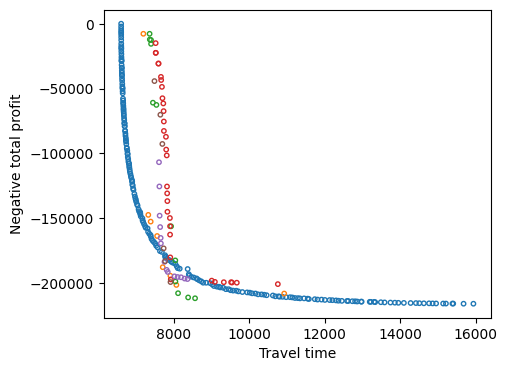

ch150_n1490_bounded-strongly-corr_02


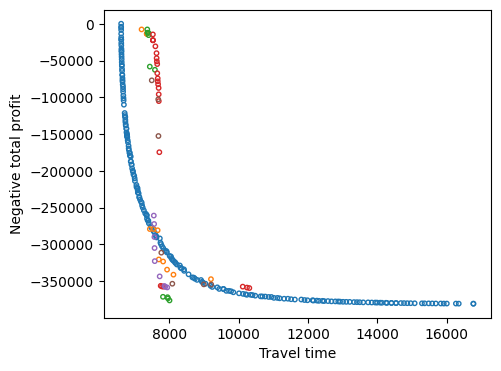

ch150_n1490_bounded-strongly-corr_03


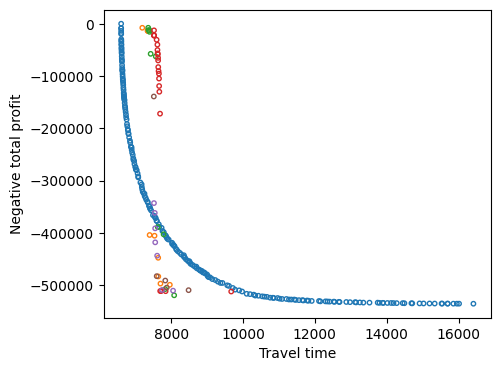

ch150_n1490_bounded-strongly-corr_04


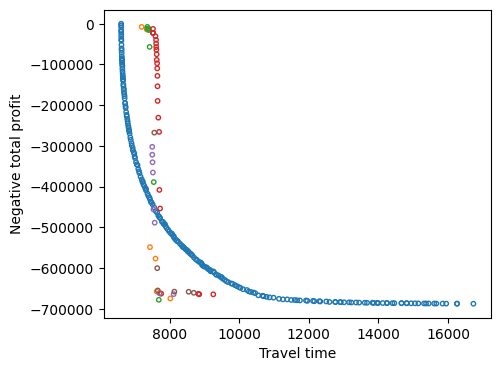

ch150_n1490_bounded-strongly-corr_05


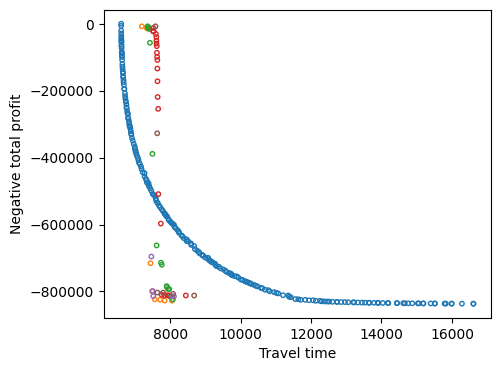

ch150_n1490_bounded-strongly-corr_06


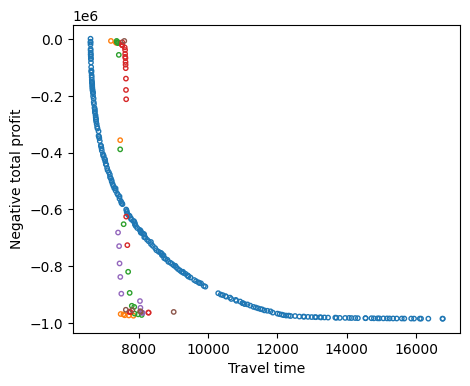

ch150_n1490_bounded-strongly-corr_07


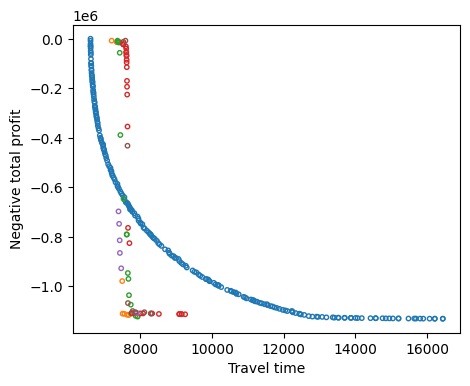

ch150_n1490_bounded-strongly-corr_08


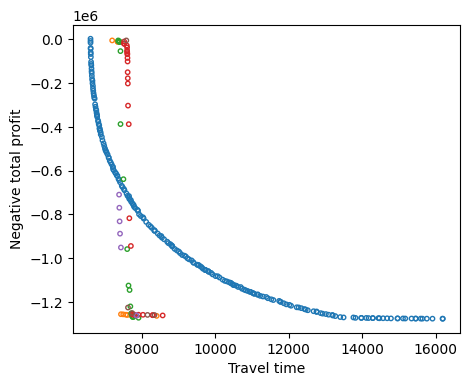

ch150_n1490_bounded-strongly-corr_09


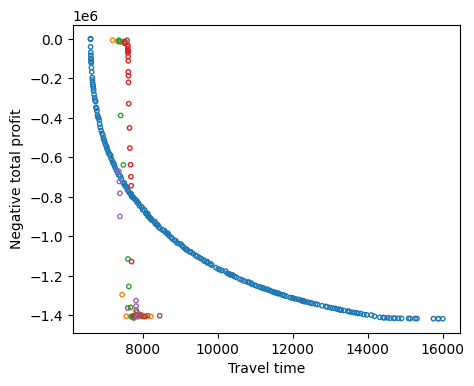

ch150_n1490_bounded-strongly-corr_10


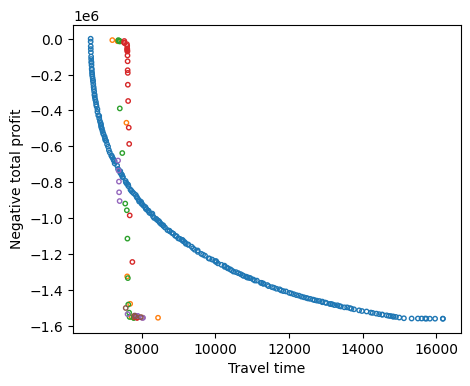

ch150_n1490_uncorr-similar-weights_01


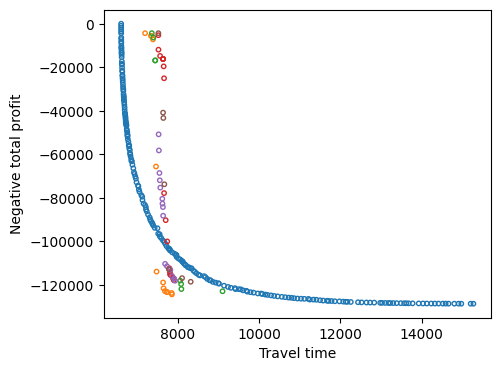

ch150_n1490_uncorr-similar-weights_02


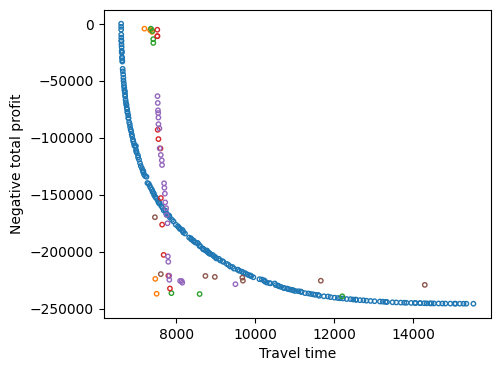

ch150_n1490_uncorr-similar-weights_03


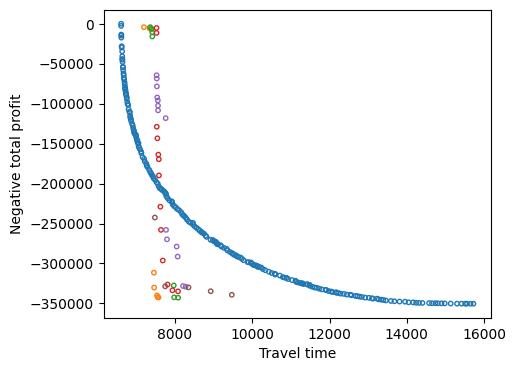

ch150_n1490_uncorr-similar-weights_04


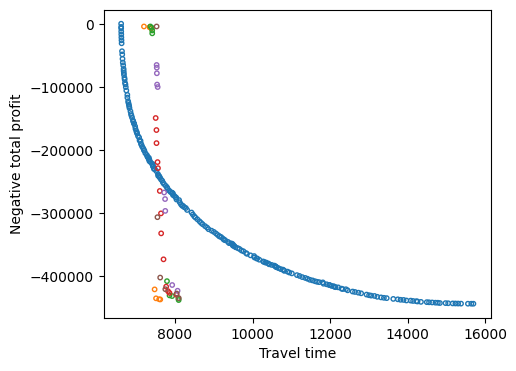

ch150_n1490_uncorr-similar-weights_05


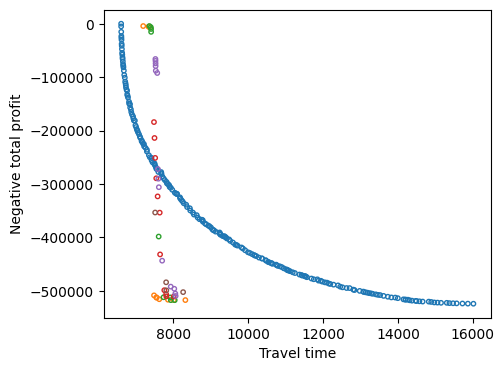

ch150_n1490_uncorr-similar-weights_06


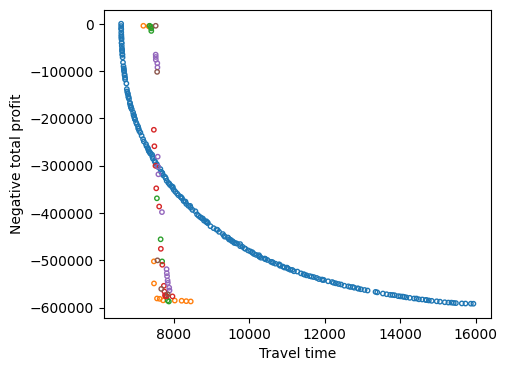

ch150_n1490_uncorr-similar-weights_07


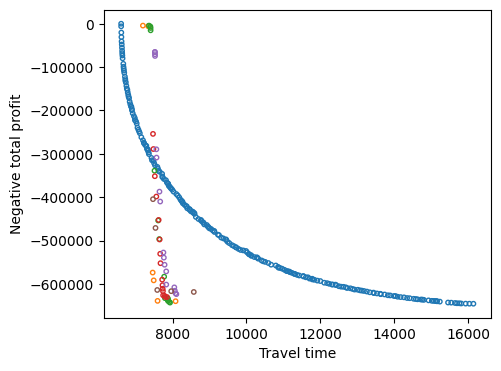

ch150_n1490_uncorr-similar-weights_08


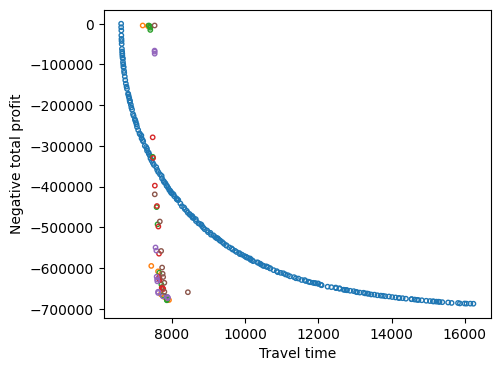

ch150_n1490_uncorr-similar-weights_09


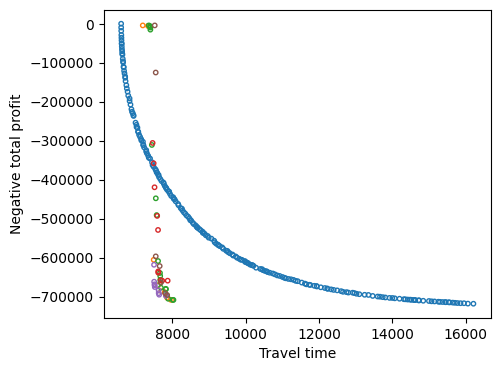

ch150_n1490_uncorr-similar-weights_10


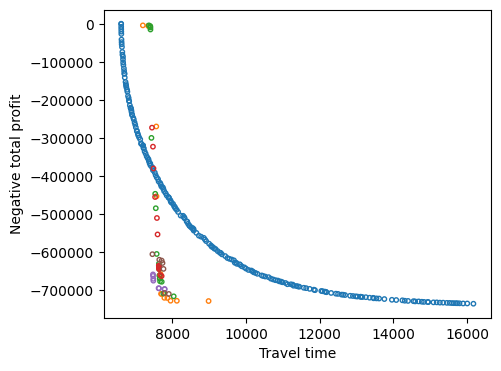

ch150_n1490_uncorr_01


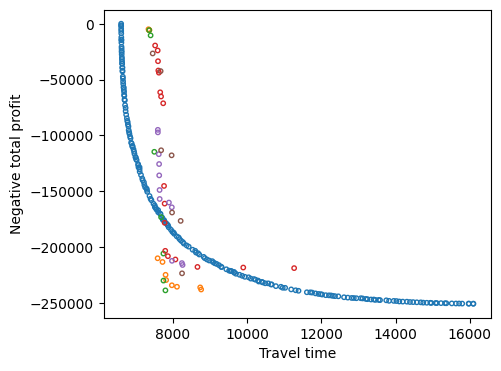

ch150_n1490_uncorr_02


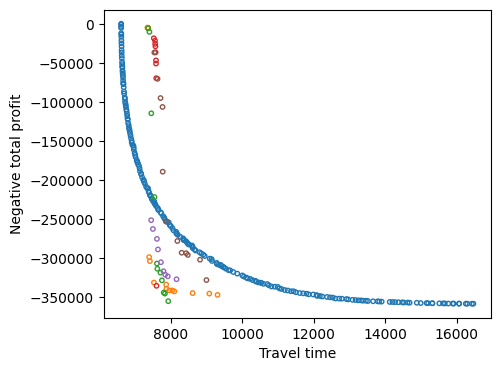

ch150_n1490_uncorr_03


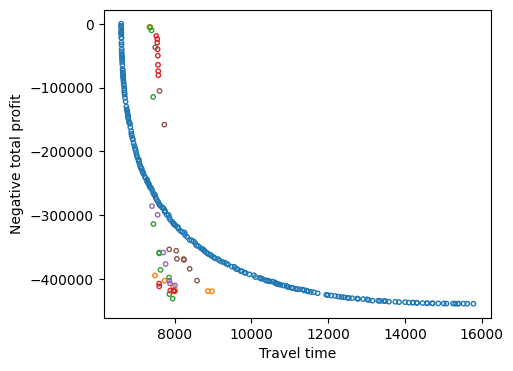

ch150_n1490_uncorr_04


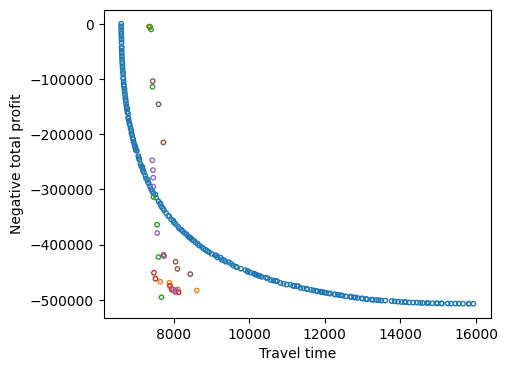

ch150_n1490_uncorr_05


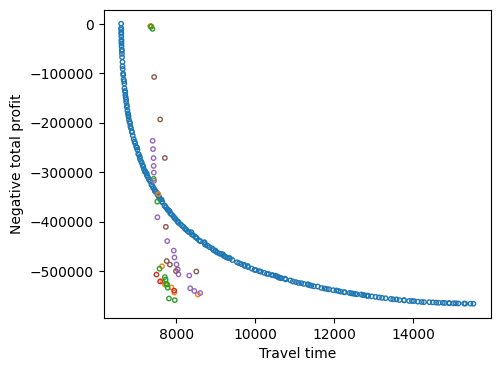

ch150_n1490_uncorr_06


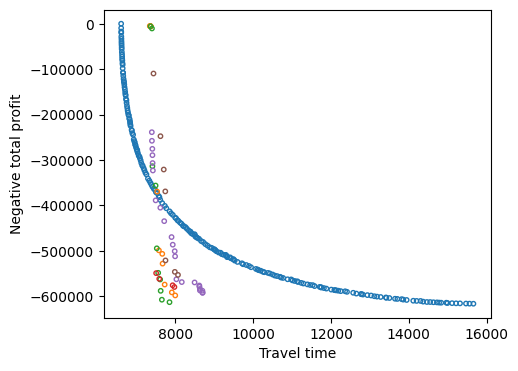

ch150_n1490_uncorr_07


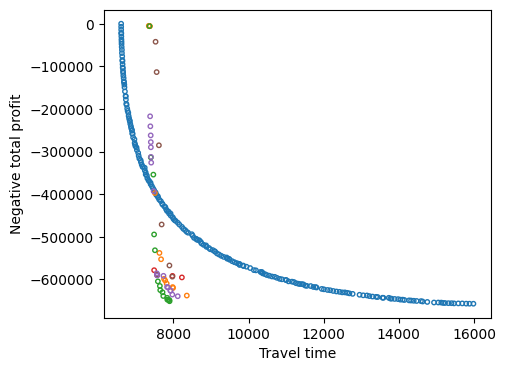

ch150_n1490_uncorr_08


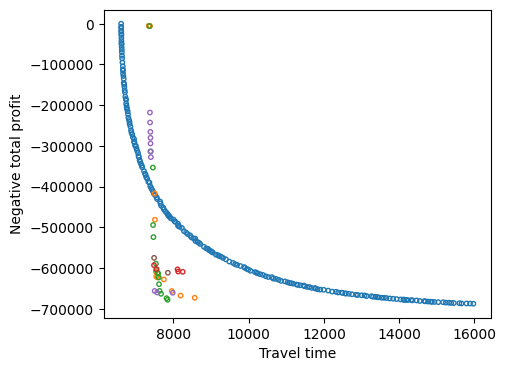

ch150_n1490_uncorr_09


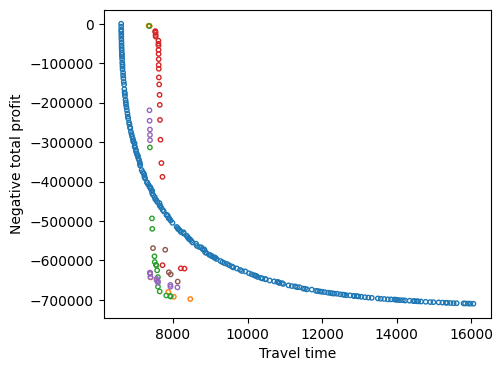

ch150_n1490_uncorr_10


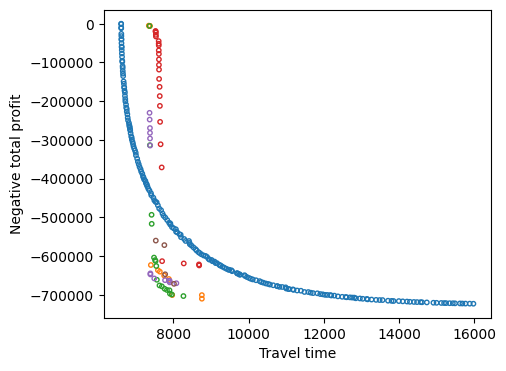

ch150_n149_bounded-strongly-corr_01


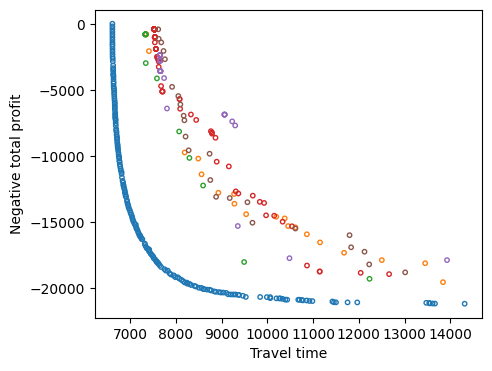

ch150_n149_bounded-strongly-corr_02


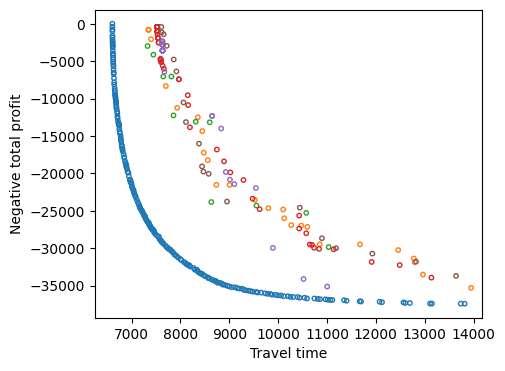

ch150_n149_bounded-strongly-corr_03


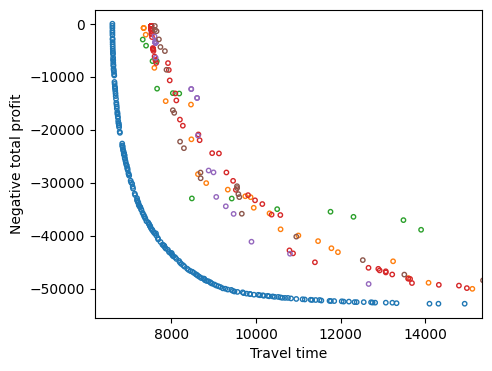

ch150_n149_bounded-strongly-corr_04


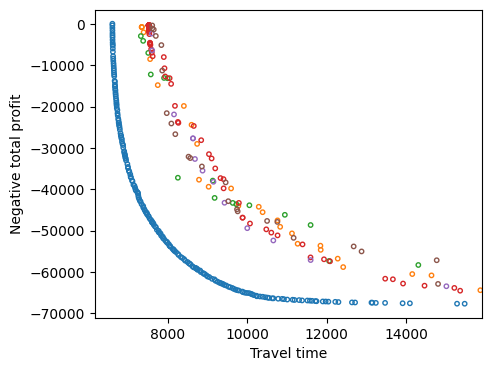

ch150_n149_bounded-strongly-corr_05


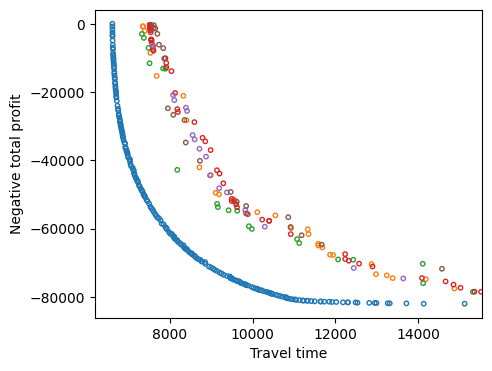

ch150_n149_bounded-strongly-corr_06


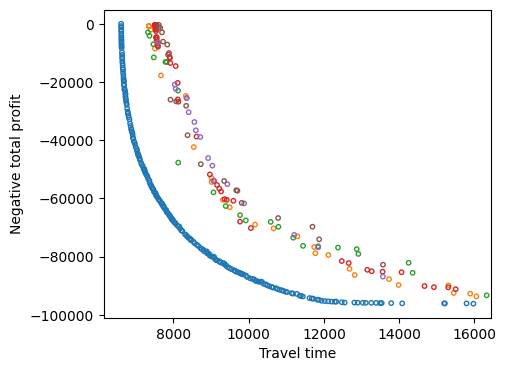

ch150_n149_bounded-strongly-corr_07


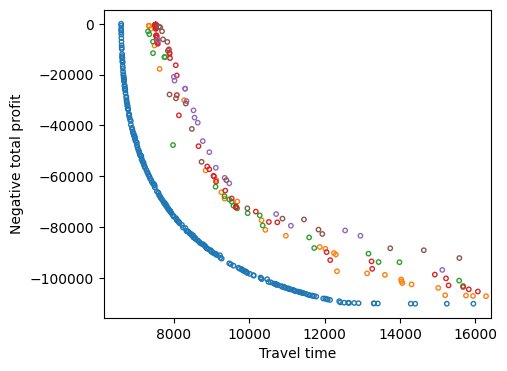

ch150_n149_bounded-strongly-corr_08


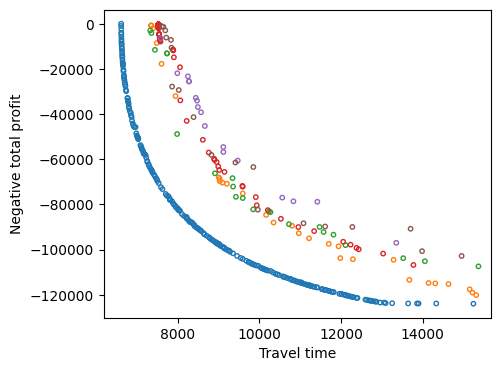

ch150_n149_bounded-strongly-corr_09


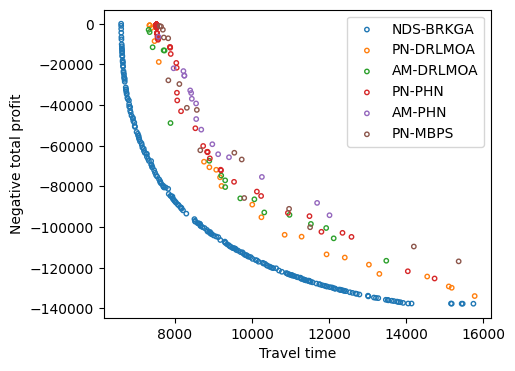

ch150_n149_bounded-strongly-corr_10


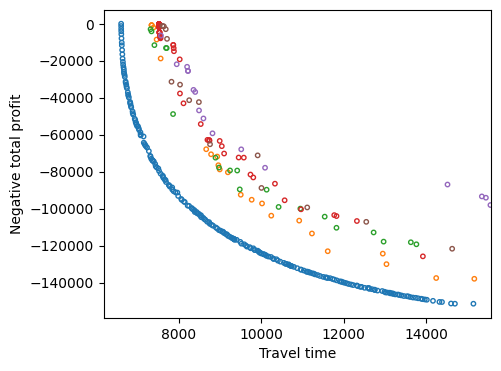

ch150_n149_uncorr-similar-weights_01


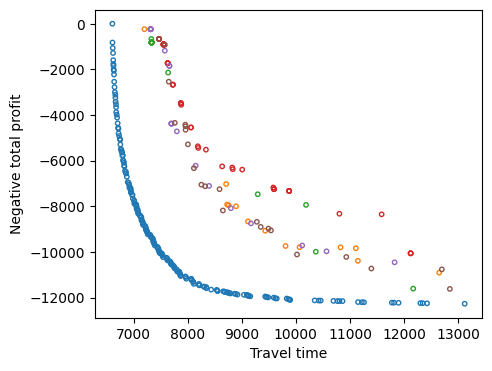

ch150_n149_uncorr-similar-weights_02


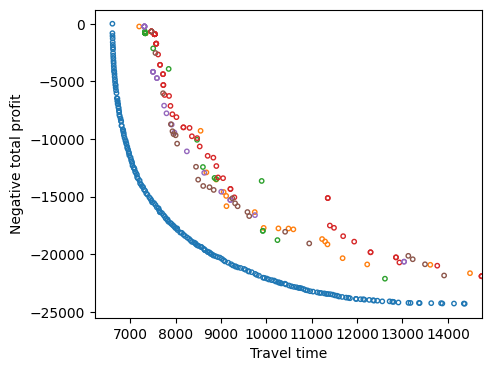

ch150_n149_uncorr-similar-weights_03


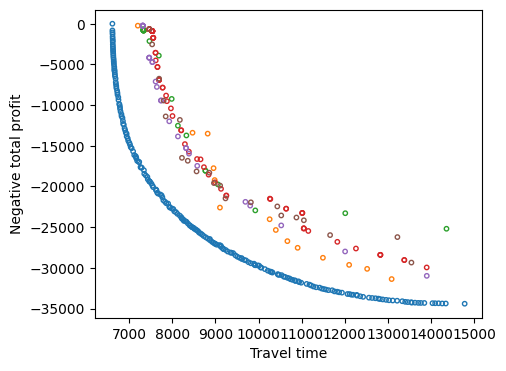

ch150_n149_uncorr-similar-weights_04


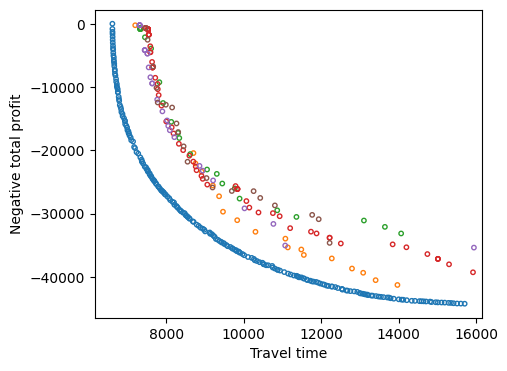

ch150_n149_uncorr-similar-weights_05


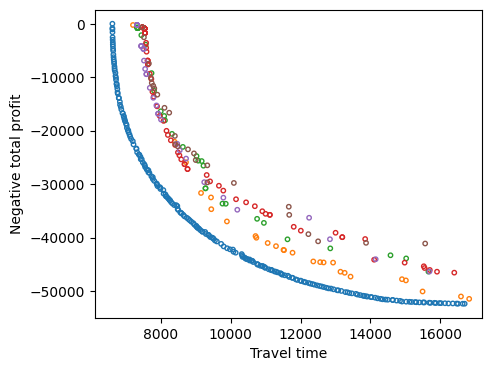

ch150_n149_uncorr-similar-weights_06


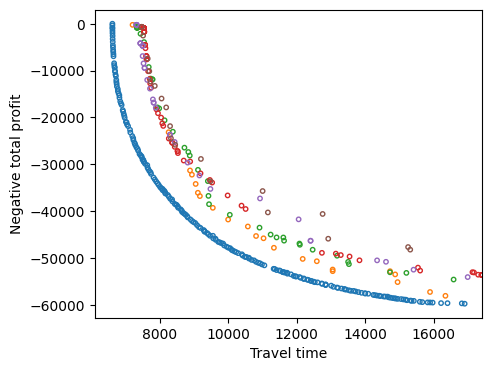

ch150_n149_uncorr-similar-weights_07


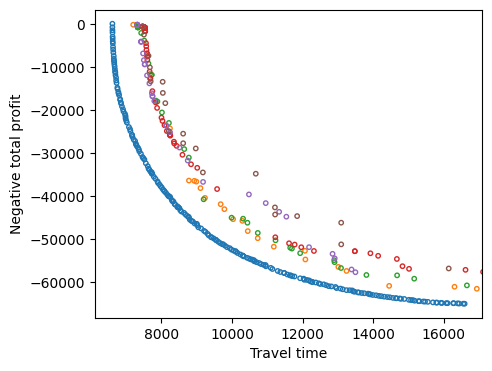

ch150_n149_uncorr-similar-weights_08


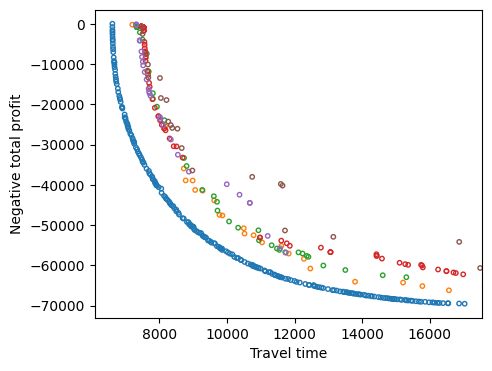

ch150_n149_uncorr-similar-weights_09


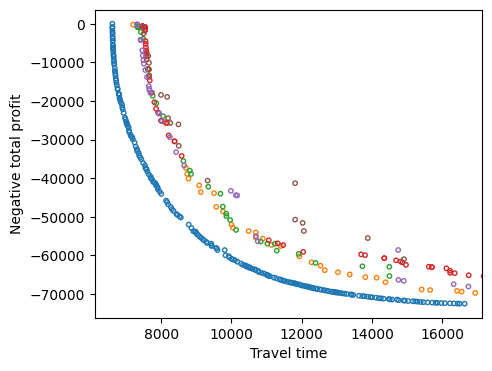

ch150_n149_uncorr-similar-weights_10


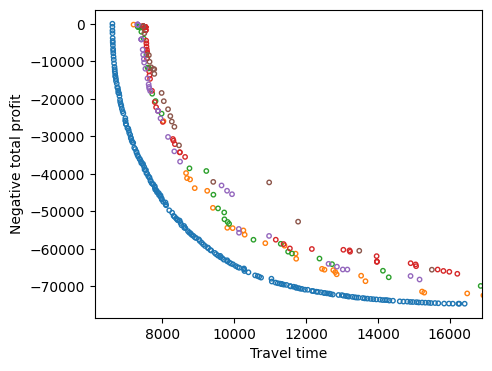

ch150_n149_uncorr_01


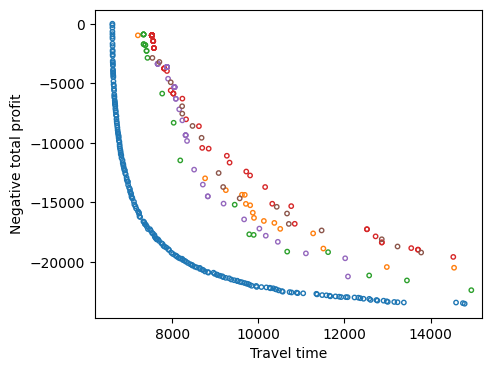

ch150_n149_uncorr_02


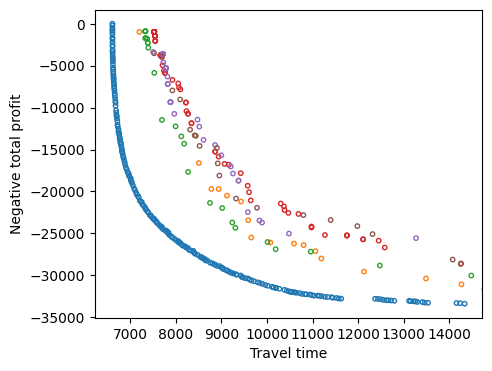

ch150_n149_uncorr_03


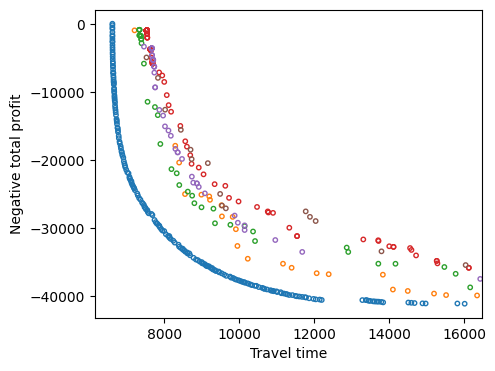

ch150_n149_uncorr_04


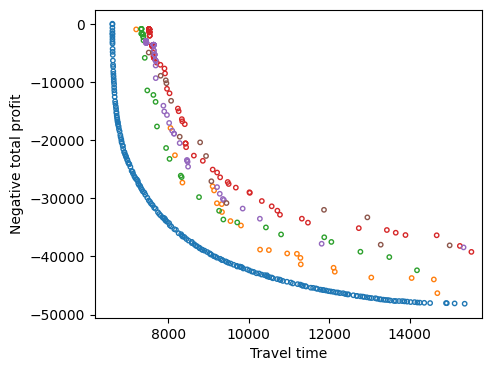

ch150_n149_uncorr_05


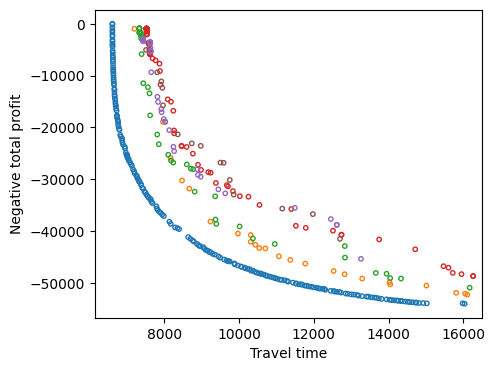

ch150_n149_uncorr_06


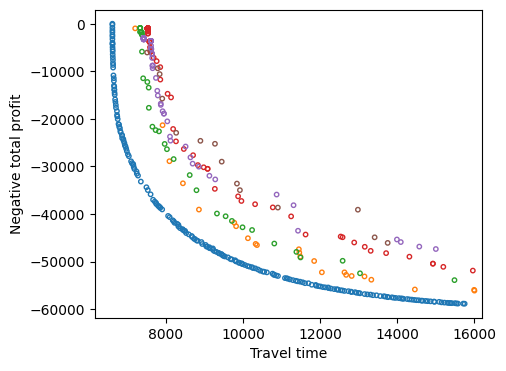

ch150_n149_uncorr_07


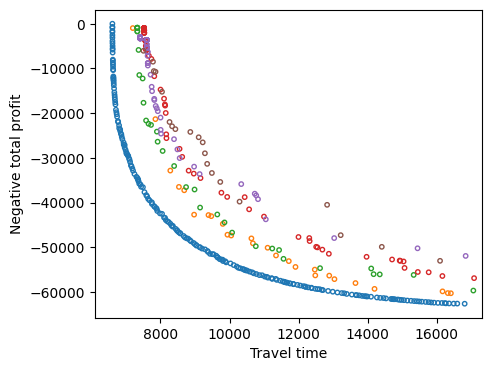

ch150_n149_uncorr_08


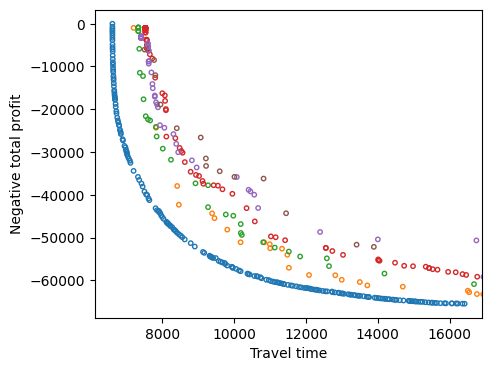

ch150_n149_uncorr_09


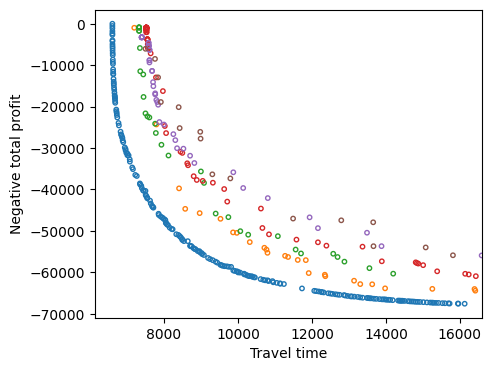

ch150_n149_uncorr_10


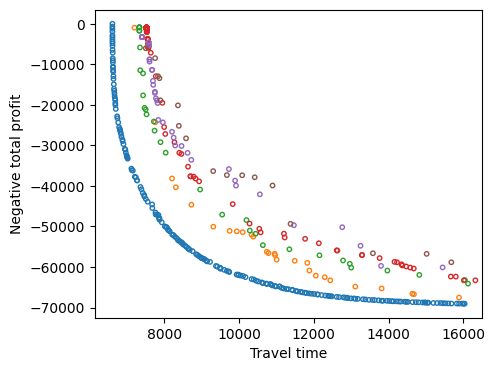

ch150_n447_bounded-strongly-corr_01


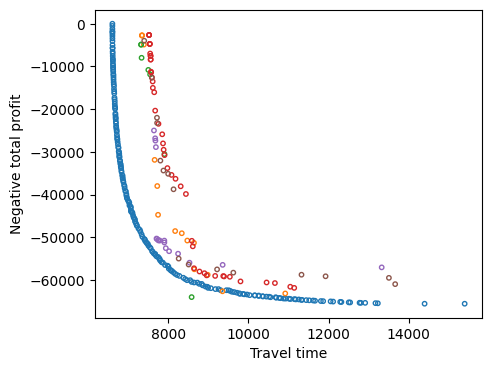

ch150_n447_bounded-strongly-corr_02


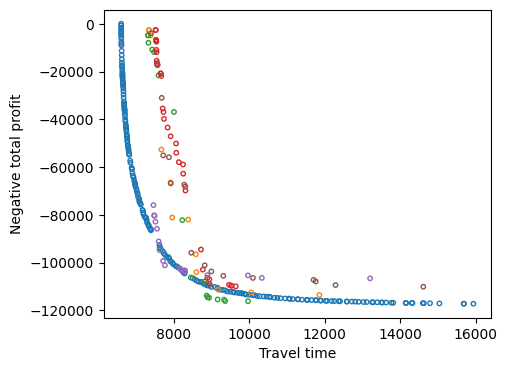

ch150_n447_bounded-strongly-corr_03


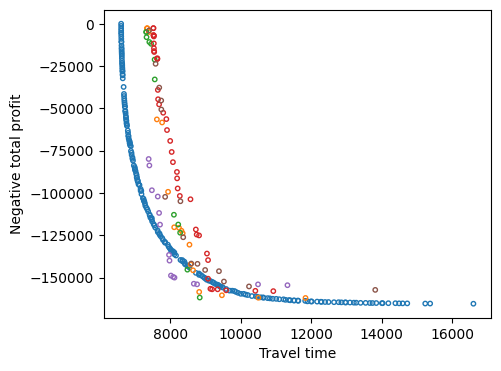

ch150_n447_bounded-strongly-corr_04


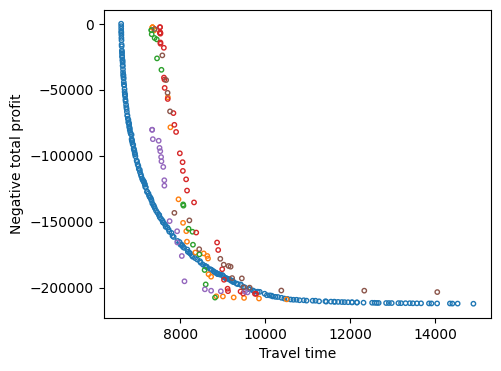

ch150_n447_bounded-strongly-corr_05


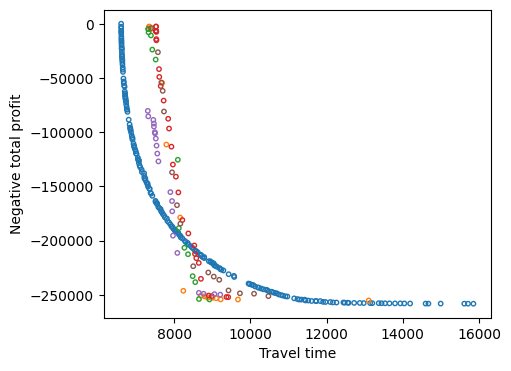

ch150_n447_bounded-strongly-corr_06


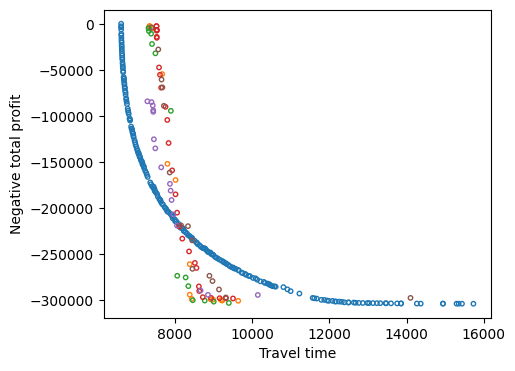

ch150_n447_bounded-strongly-corr_07


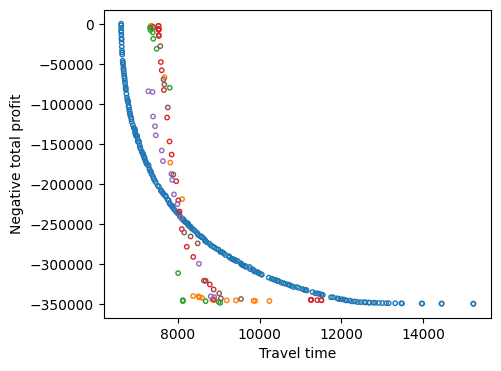

ch150_n447_bounded-strongly-corr_08


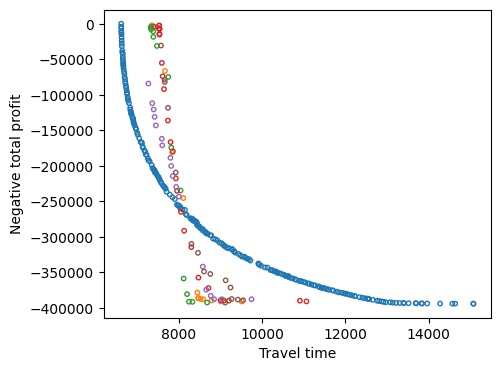

ch150_n447_bounded-strongly-corr_09


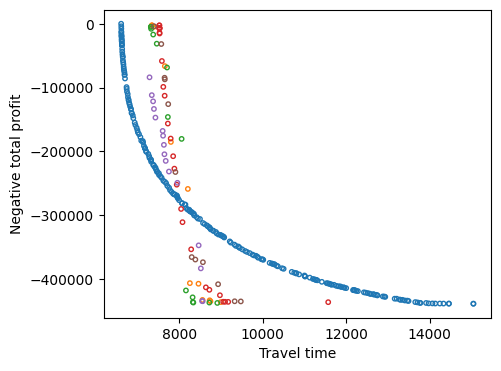

ch150_n447_bounded-strongly-corr_10


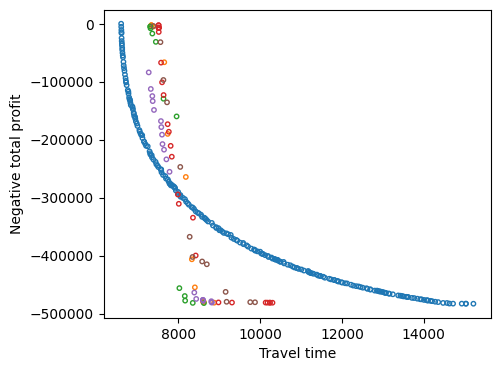

ch150_n447_uncorr-similar-weights_01


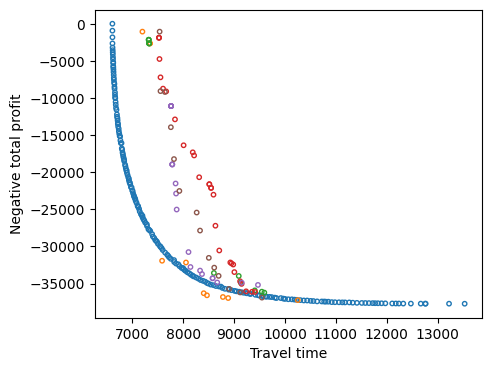

ch150_n447_uncorr-similar-weights_02


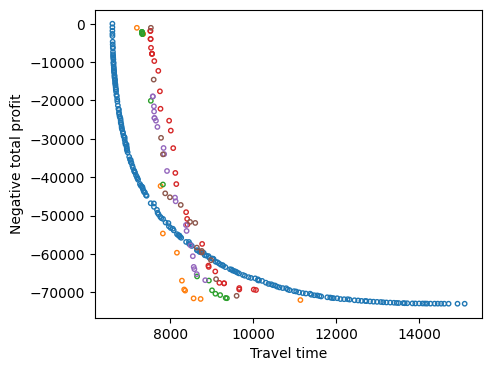

ch150_n447_uncorr-similar-weights_03


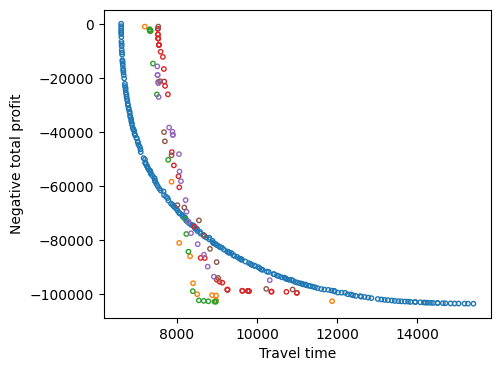

ch150_n447_uncorr-similar-weights_04


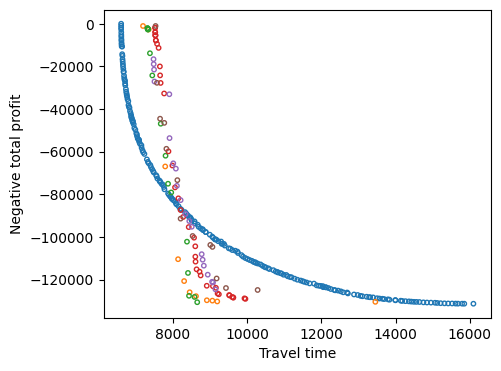

ch150_n447_uncorr-similar-weights_05


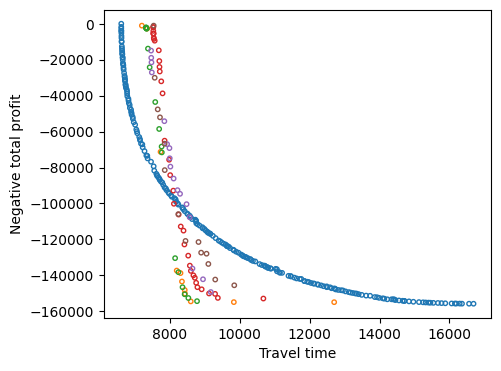

ch150_n447_uncorr-similar-weights_06


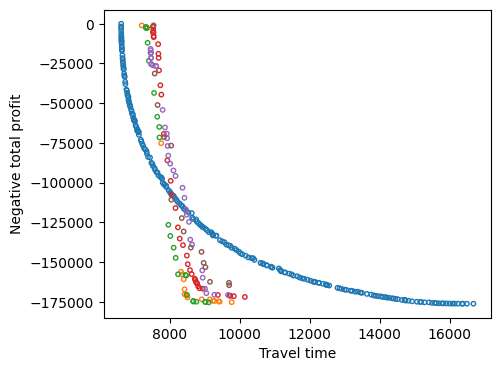

ch150_n447_uncorr-similar-weights_07


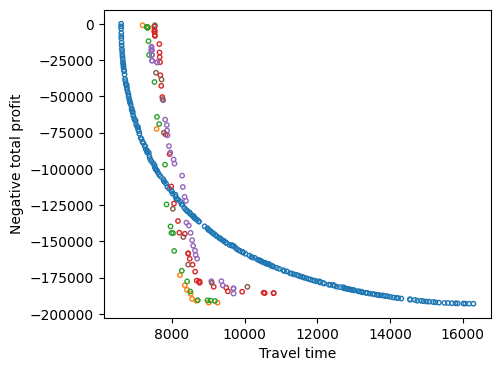

ch150_n447_uncorr-similar-weights_08


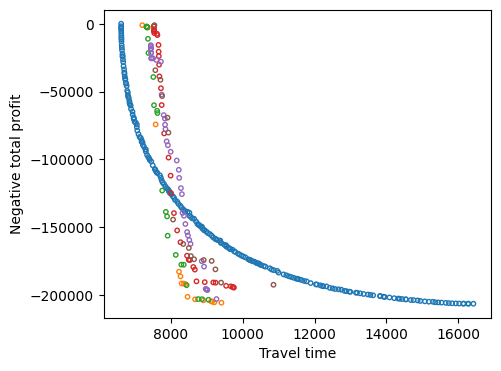

ch150_n447_uncorr-similar-weights_09


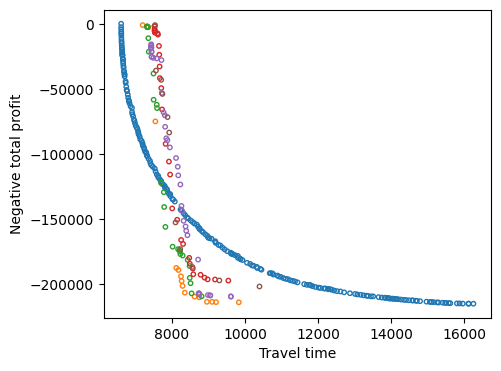

ch150_n447_uncorr-similar-weights_10


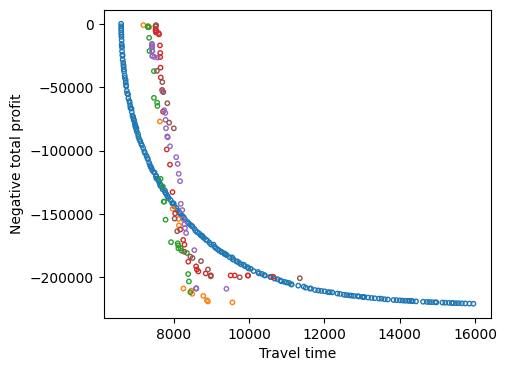

ch150_n447_uncorr_01


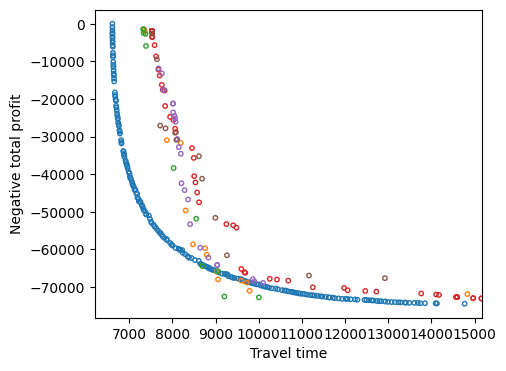

ch150_n447_uncorr_02


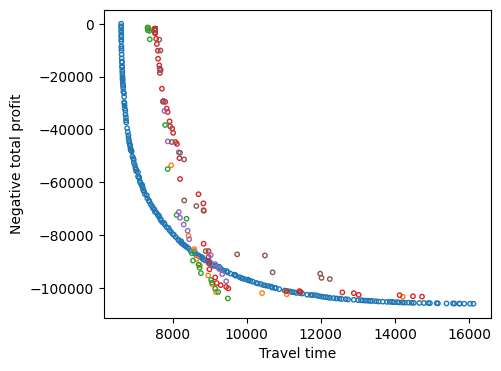

ch150_n447_uncorr_03


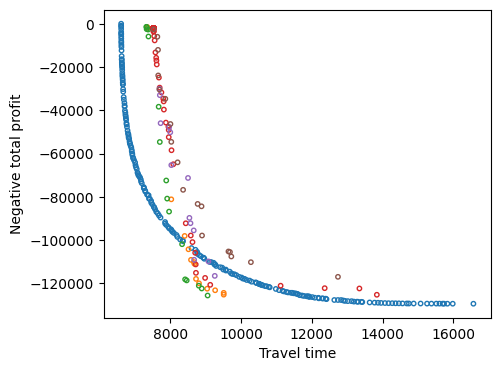

ch150_n447_uncorr_04


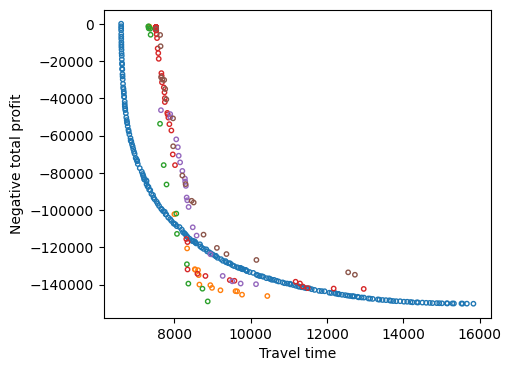

ch150_n447_uncorr_05


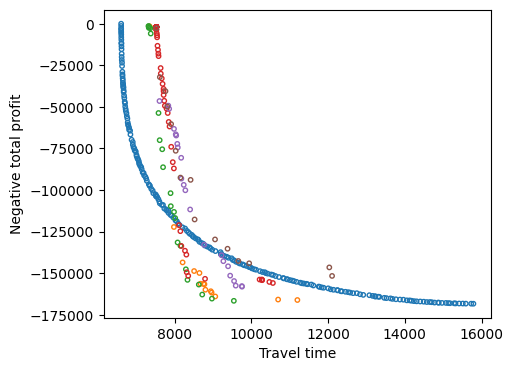

ch150_n447_uncorr_06


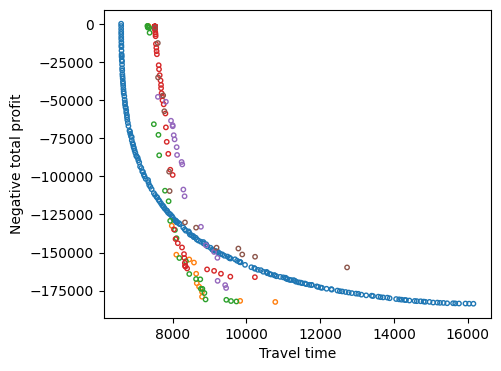

ch150_n447_uncorr_07


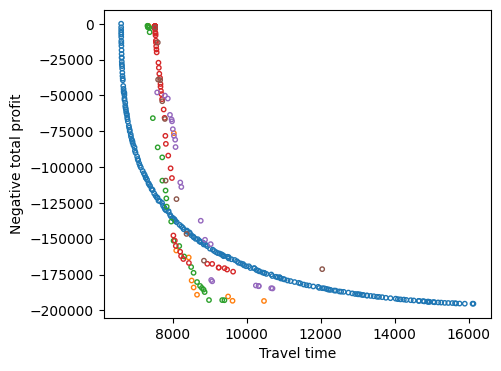

ch150_n447_uncorr_08


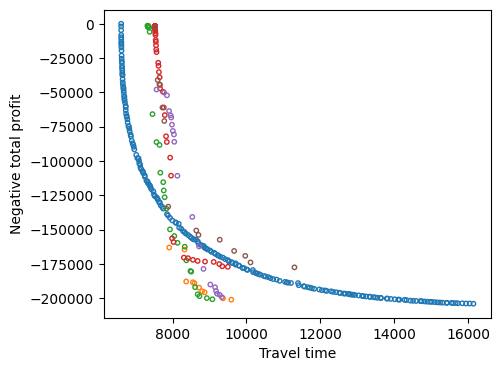

ch150_n447_uncorr_09


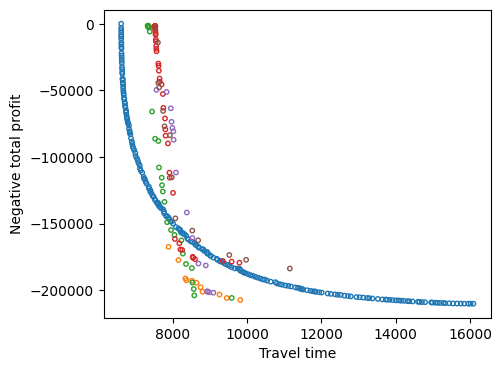

ch150_n447_uncorr_10


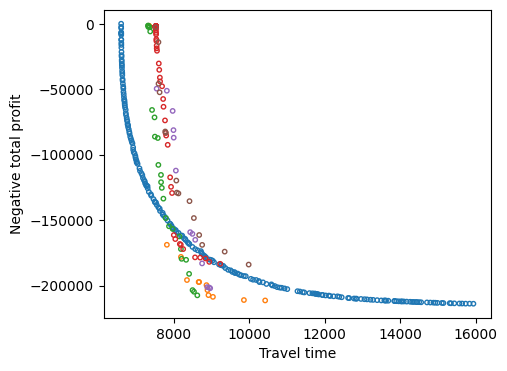

ch150_n745_bounded-strongly-corr_01


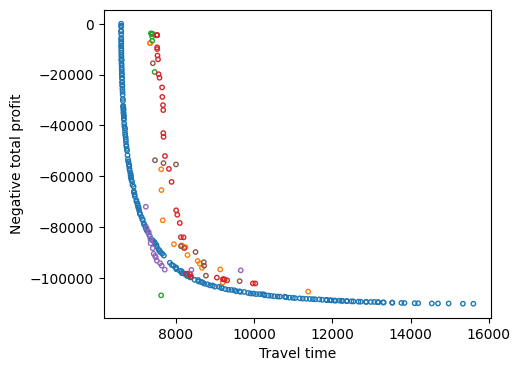

ch150_n745_bounded-strongly-corr_02


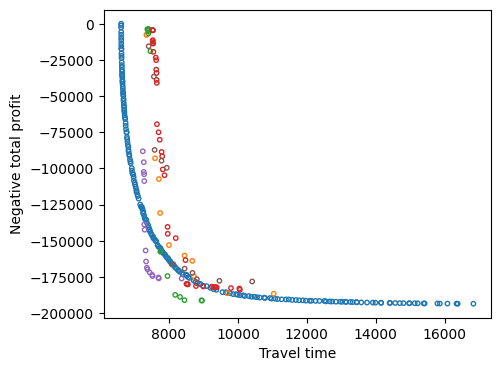

ch150_n745_bounded-strongly-corr_03


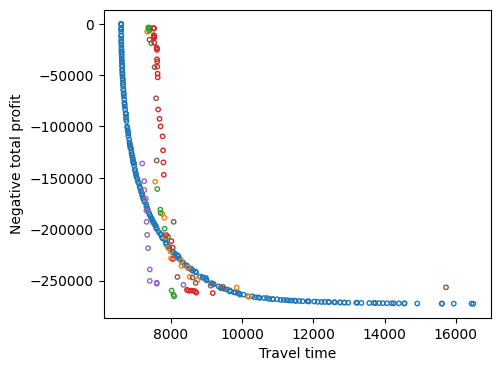

ch150_n745_bounded-strongly-corr_04


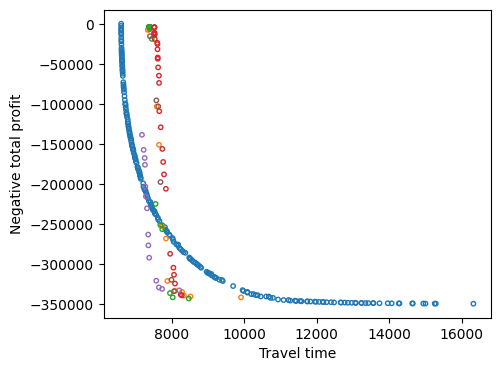

ch150_n745_bounded-strongly-corr_05


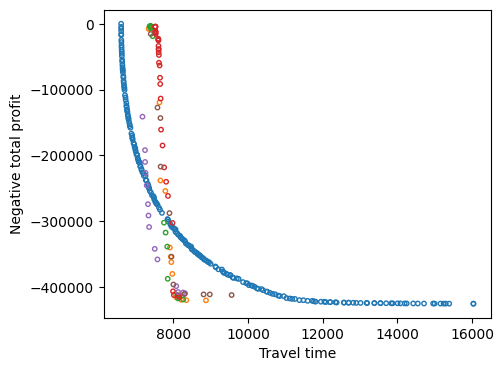

ch150_n745_bounded-strongly-corr_06


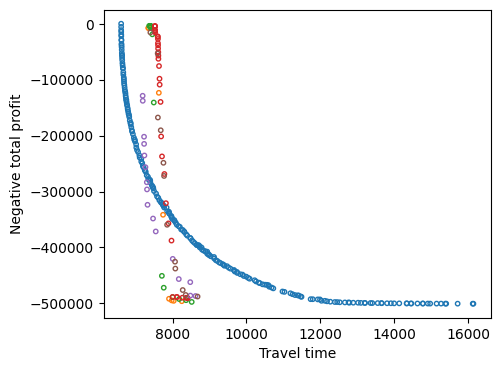

ch150_n745_bounded-strongly-corr_07


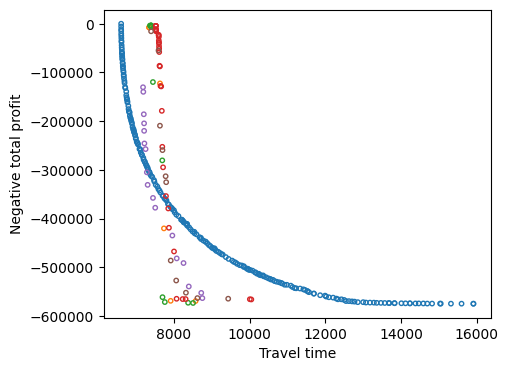

ch150_n745_bounded-strongly-corr_08


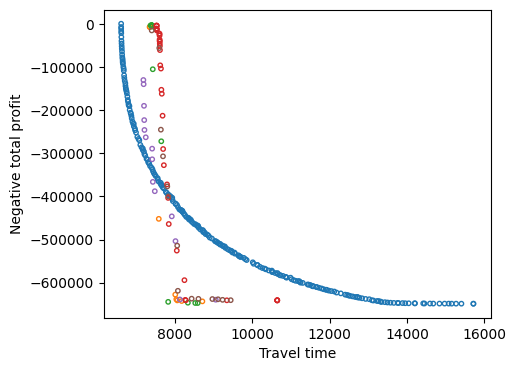

ch150_n745_bounded-strongly-corr_09


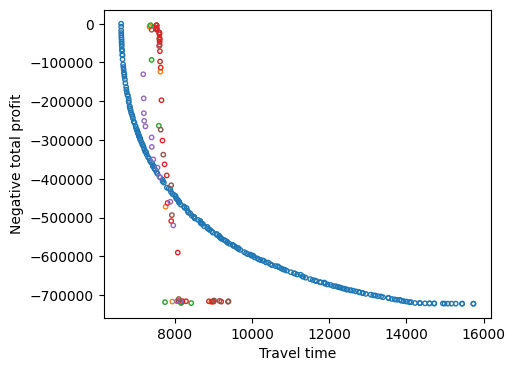

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_bounded-strongly-corr_10


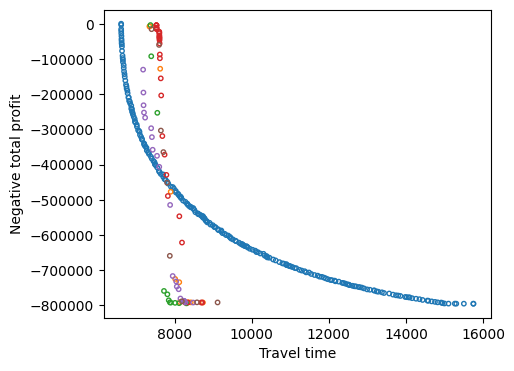

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_01


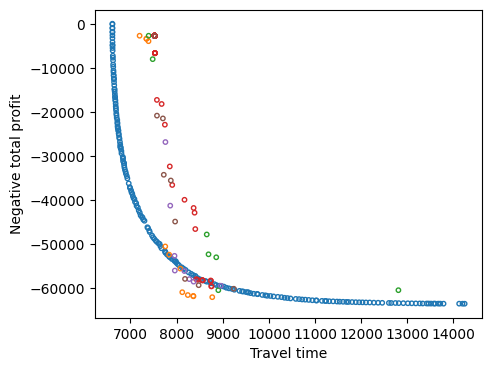

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_02


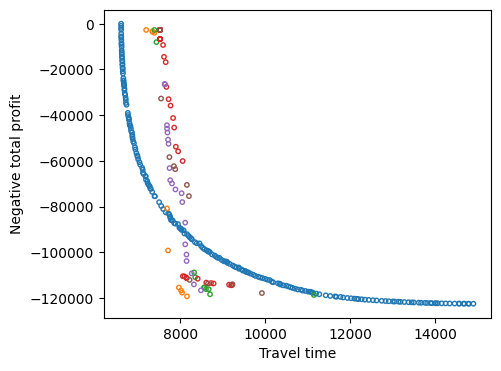

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_03


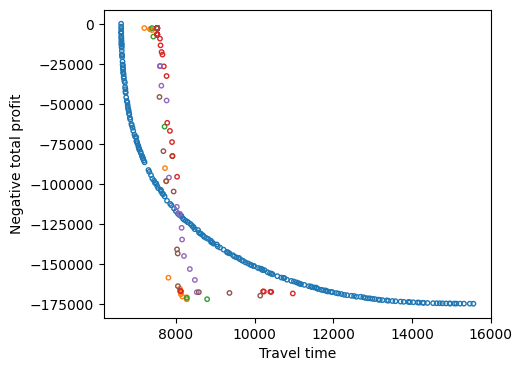

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_04


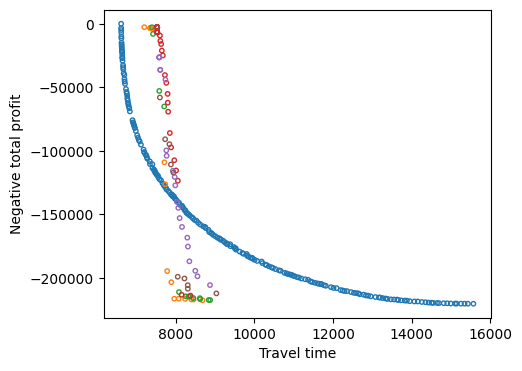

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_05


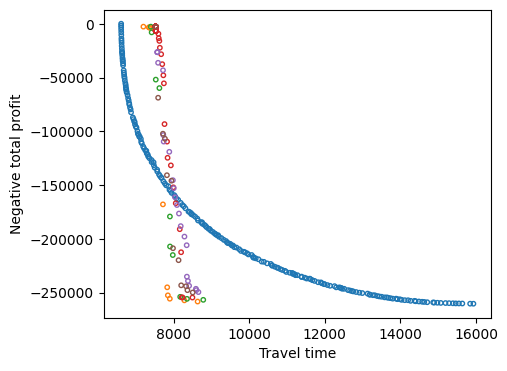

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_06


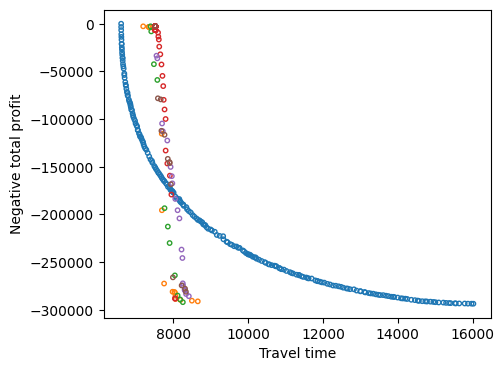

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_07


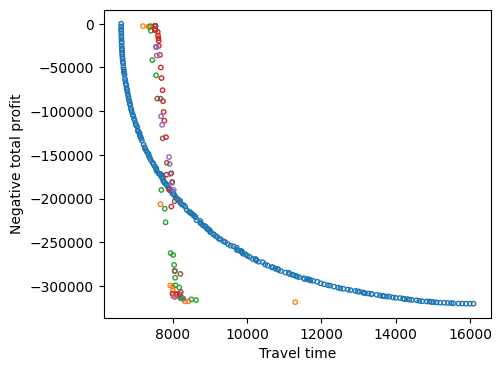

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_08


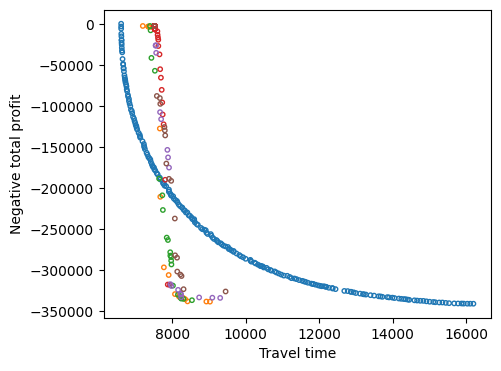

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_09


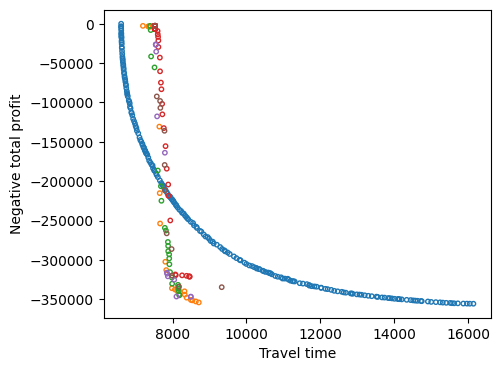

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr-similar-weights_10


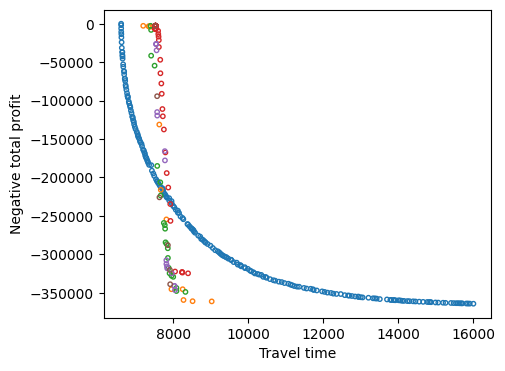

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_01


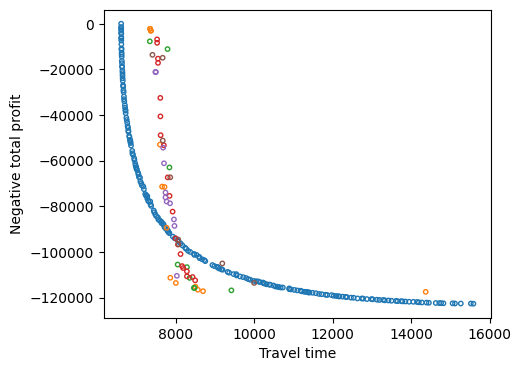

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_02


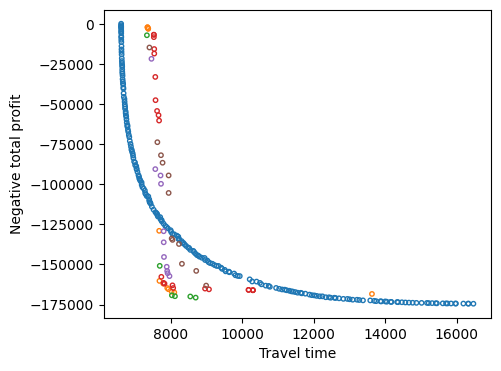

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_03


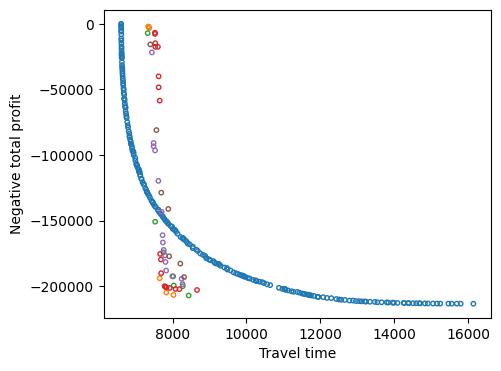

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_04


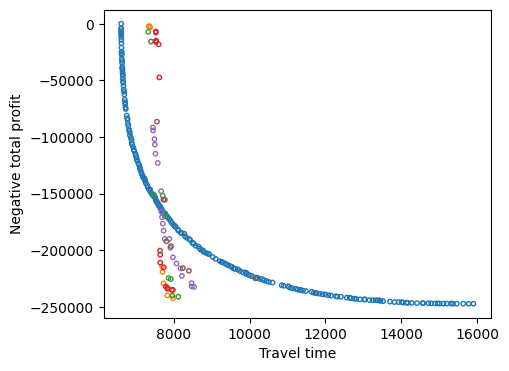

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_05


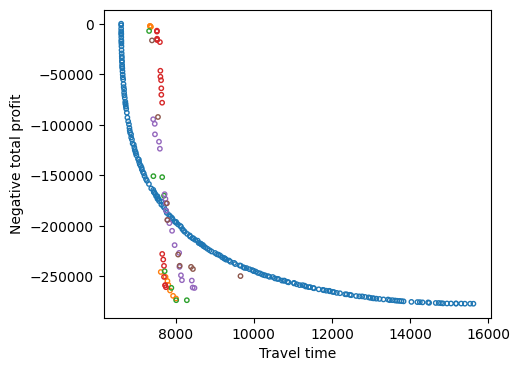

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_06


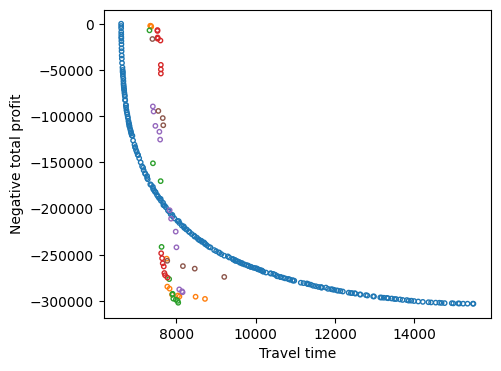

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_07


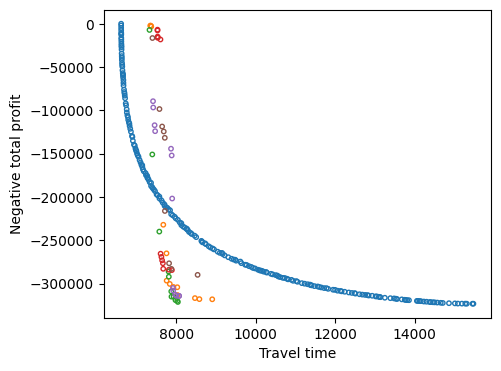

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_08


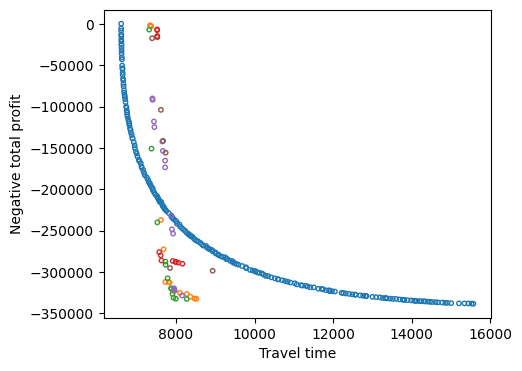

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_09


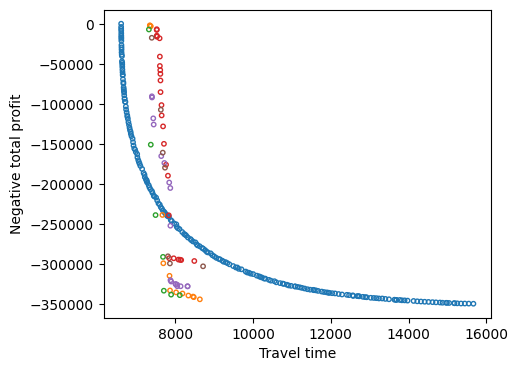

C:\Users\USER\AppData\Local\Temp\ipykernel_9532\4204530532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nd_size_df[problem] = nd_size_list


ch150_n745_uncorr_10


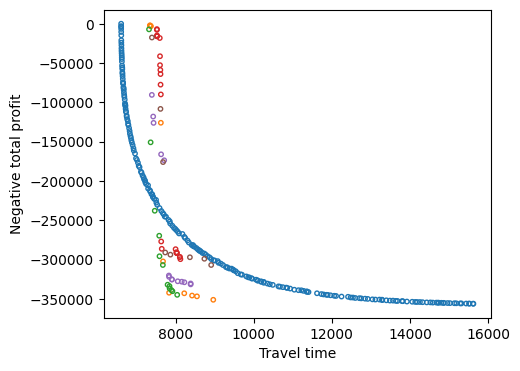

In [6]:
print("Plot the results. If points are not shown there are not in the non-dominated region.")

import matplotlib.cm as cm
cmap = cm.get_cmap('tab10')

only_top_3 = False
nd_size_df = pd.DataFrame()
nd_size_df["algorithms"] = participants
for idx, problem in enumerate(problems):
    nd_size_list = []
    plt.figure(figsize=(5, 4))
    for k, participant in enumerate(participants):
        if not only_top_3 or (only_top_3 and participant in ["HPI", "jomar", "NTGA"]):

            _F = data[problem][participant]
            if len(_F.shape) == 1:
                _F = _F[np.newaxis, :]
            participant_label = participant_name_dict[participant]
#             participant_label = participant
            I = fast_non_dominated_sort(_F)[0]
            nondom_F = _F[I]
            nd_size_list += [len(nondom_F)]
            plt.scatter(nondom_F[:,0], nondom_F[:,1], label=participant_label, s=10, facecolors='none', edgecolors=cmap(k))
#             plt.scatter(_F[:,0], _F[:,1], label=participant_label, s=10, facecolors='none', edgecolors=cmap(k))

    nd_size_df[problem] = nd_size_list
    _all = np.row_stack([data[problem][participant] for participant in participants])
    I = fast_non_dominated_sort(_all)[0]
    _non_dom = _all[I]
    
#     _min = _all.min(axis=0)
#     _max = _all.max(axis=0)
    _min = _non_dom.min(axis=0)
    _max = _non_dom.max(axis=0)
    _range = _max - _min
        
    print("=" * 60)
    print(problem)
    print("=" * 60)
    plt.xlabel("Travel time")
    plt.ylabel("Negative total profit")
    plt.xlim(_min[0] - 0.05 * _range[0], _max[0] + 0.05 * _range[0])
    plt.ylim(_min[1] - 0.05 * _range[1], _max[1] + 0.05 * _range[1])
#     plt.legend()
    if problem == "eil76_n75_bounded-strongly-corr_01" or problem == "eil76_n75_bounded-strongly-corr_04" or problem == "ch150_n149_bounded-strongly-corr_09":
        plt.legend()
    plt.gcf()
    plt.savefig("solution/"+graph[idx]+"/solution_plot_"+problem+".jpg", dpi=200, bbox_inches='tight')
    plt.show()

# nd_size_df.to_csv("nondom_solutions_num.csv")

## Find the reference non-dominated set for each test instance

For each problem we merge the submissions to a new population and filter out the non-dominated solutions. Then, we take the minimum and the maximum of this set as the ideal and nadir point the normalize the results.

In [9]:

ideal_point = {}
nadir_point = {}
ndf = {}

for problem in problems:
    
    # the merged non-dominated solutions for the specific problem
    M = []
    for participant in participants:    
        _F = data[problem][participant]
        M.append(_F)
        
    M = np.vstack(M)    
    I = fast_non_dominated_sort(M)[0]
    M = M[I, :]
    
    ideal_point[problem] = np.min(M, axis=0)
    nadir_point[problem] = np.max(M, axis=0)
    ndf[problem] = M
    
    

In the following for each problem the non-dominated set of solutions is first normalized using the boundaries and hypervolume is calculated.

In [10]:
results = []

for problem in problems:
    
    z = ideal_point[problem]
    z_nad = nadir_point[problem]
 
    for participant in participants:    
        _F = data[problem][participant]
        _N = normalize(_F, z, z_nad)
        _hv = Hypervolume(np.array([1,1])).calc(_N)
        results.append({'problem' : problem, 'participant' : participant, 'hv' : _hv})
        
df = pd.DataFrame(results, columns=["problem", "participant", "hv"])


In [11]:
# print(df.to_csv("all_hv.csv"))

for problem in problems:

    print("=" * 60)
    print(problem)
    print("=" * 60)
    
    _df = df[df["problem"] == problem].copy()
    _df.sort_values("hv", ascending=False, inplace=True)
    _df.reset_index(drop=True, inplace=True)
    print(_df)

eil76_n225_bounded-strongly-corr_01
                               problem     participant        hv
0  eil76_n225_bounded-strongly-corr_01    nds-brkga_bi  0.921593
1  eil76_n225_bounded-strongly-corr_01  att-drlmoa-eil  0.872349
2  eil76_n225_bounded-strongly-corr_01         mpn-eil  0.867246
3  eil76_n225_bounded-strongly-corr_01         PN-MBPS  0.839615
4  eil76_n225_bounded-strongly-corr_01          PN-PHN  0.816965
5  eil76_n225_bounded-strongly-corr_01          AM-PHN  0.806422
eil76_n225_bounded-strongly-corr_02
                               problem     participant        hv
0  eil76_n225_bounded-strongly-corr_02    nds-brkga_bi  0.927005
1  eil76_n225_bounded-strongly-corr_02  att-drlmoa-eil  0.889059
2  eil76_n225_bounded-strongly-corr_02         mpn-eil  0.886091
3  eil76_n225_bounded-strongly-corr_02         PN-MBPS  0.858276
4  eil76_n225_bounded-strongly-corr_02          PN-PHN  0.852274
5  eil76_n225_bounded-strongly-corr_02          AM-PHN  0.835740
eil76_n225_bounded

The data frame contains all results. Now, we need to rank the submission for each test instance:

In [12]:
# the final ranking. And add zero points initially (sum is later taken anyway...)
ranking = []
for participant in participants:
    ranking.append({'participant': participant, 'points' : 0})


# one more time loop through problem wise
for problem in problems:
    
    _df = df[df["problem"] == problem].copy()
    
    # sort descending by hv
    _df.sort_values("hv", ascending=False, inplace=True)
    
    # 3 points for the 1st place
    first = _df.iloc[0]["participant"]
    ranking.append({'participant': first, 'points' : 3})
    
    # 2 points for the 2nd place
    second = _df.iloc[1]["participant"]
    ranking.append({'participant': second, 'points' : 2})
    
    # 1 point for the 3rd place
    third = _df.iloc[2]["participant"]
    ranking.append({'participant': third, 'points' : 1})

    
ranking = pd.DataFrame(ranking, columns=["participant", "points"])

# Leaderboard

Finally, we sum up the hypervolume for each problem and evaluate the winner!

In [13]:
ranking.groupby('participant').sum().sort_values("points", ascending=False)

points
participant           
mpn-eil            216
att-drlmoa-eil     183
nds-brkga_bi       156
AM-PHN              93
PN-MBPS             56
PN-PHN              16

## Leaderboard as HTML

In [6]:


standalone = True
if standalone:
    print("<script src='https://code.jquery.com/jquery-3.2.1.slim.min.js' integrity='sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN' crossorigin='anonymous'></script>")
    print("<script src='https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js' integrity='sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q' crossorigin='anonymous'></script>")
    print("<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js' integrity='sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl' crossorigin='anonymous'></script>")

print("<div class='row'><div class='w-50'>")
print("<table class='table'>")
print("<tr><th>Problem</th><th>Team</th><th>Hypervolume</th><th>Estimated Ideal Point</th><th>Estimated Nadir Point</th></tr>")

for problem in problems:
    
    _df = df[df["problem"] == problem].copy()
    _df.sort_values("hv", ascending=False, inplace=True)
    _df.reset_index(drop=True)
    
    first = True
    for i, e in _df.iterrows():
        
        problem, team, hv = e.values
        
        if first:
            
            s_row_span = "<th rowspan='%s'>%s</th>"
            
            s_problem = s_row_span % (len(_df), problem)
            s_ideal = s_row_span % (len(_df), "(%s, %s)" % (round(ideal_point[problem][0]), round(ideal_point[problem][1])))
            s_nadir = s_row_span % (len(_df), "(%s, %s)" % (round(nadir_point[problem][0]), round(nadir_point[problem][1])))
            
            print("<tr>%s <th>%s</th> <th>%s</th> %s %s  </tr>" 
                  % (s_problem, team, round(hv,4), s_ideal, s_nadir))
        else:
            print("<tr><th>%s</th><th>%s</th></tr>" % (team, round(hv,4)))
        
            
        first = False
        
    print()
    
    
print("<table>")
print("</div></div>")

<script src='https://code.jquery.com/jquery-3.2.1.slim.min.js' integrity='sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN' crossorigin='anonymous'></script>
<script src='https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js' integrity='sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q' crossorigin='anonymous'></script>
<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js' integrity='sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl' crossorigin='anonymous'></script>
<div class='row'><div class='w-50'>
<table class='table'>
<tr><th>Problem</th><th>Team</th><th>Hypervolume</th><th>Estimated Ideal Point</th><th>Estimated Nadir Point</th></tr>


NameError: name 'df' is not defined

In [11]:
_ranking = ranking.groupby('participant').sum().sort_values("points", ascending=False)

standalone = True
if standalone:
    print("<script src='https://code.jquery.com/jquery-3.2.1.slim.min.js' integrity='sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN' crossorigin='anonymous'></script>")
    print("<script src='https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js' integrity='sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q' crossorigin='anonymous'></script>")
    print("<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js' integrity='sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl' crossorigin='anonymous'></script>")


print("<div class='row'><div class='w-50'>")
print("<table class='table'>")
print("<tr><th>Rank</th><th>Team</th><th>Points</th></tr>")


counter = 0
for i, e in _ranking.iterrows():
    print("<tr><th>%s</th><th>%s</th><th>%s</th></tr>" % (counter+1, i, e[0]))
    counter += 1

    
print("<table>")
print("</div></div>")


<script src='https://code.jquery.com/jquery-3.2.1.slim.min.js' integrity='sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN' crossorigin='anonymous'></script>
<script src='https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js' integrity='sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q' crossorigin='anonymous'></script>
<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js' integrity='sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl' crossorigin='anonymous'></script>
<div class='row'><div class='w-50'>
<table class='table'>
<tr><th>Rank</th><th>Team</th><th>Points</th></tr>
<tr><th>1</th><th>HPI</th><th>3</th></tr>
<tr><th>2</th><th>jomar</th><th>2</th></tr>
<tr><th>3</th><th>shisunzhang</th><th>1</th></tr>
<tr><th>4</th><th>ALLAOUI</th><th>0</th></tr>
<tr><th>5</th><th>FRA</th><th>0</th></tr>
<tr><th>6</th><th>JG</th><th>0</th></tr>
<tr><th>7</th><th>NTGA</th><th>0</th></